# Project 2 - Ames Housing Top Features 
____
____

## Contents:
___
* [Summary](#Summary)
* [Problem Statement](#Problem-Statement)
* [Resources](#Resources)
* [Import Libraries](#Import-Libraries)
* [Import Data](#Import-Data)
* [Sneak Peek](#Sneak-Peek)
* [Pre-Exploratory Data Analysis](#Pre-Exploratory-Data-Analysis)
* [Data Cleaning](#Data-Cleaning)
* [Data Dictionary](#Data-Dictionary)
* [Old vs New: Top 10 Features](#Old-vs-New:-Top-10-Features)
* [Feature Engineering](#Feature-Engineering)
* [Multicollinearity](#Multicollinearity)
* [EDA - Exploratory Data Analysis](#EDA---Exploratory-Data-Analysis)
* [Modelling](#Modelling)
* [Recommedations & Conclusions](#Recommedations-&-Conclusions)
___

## Summary
___
The Ames Housing Data Set contains information from the Ames Assessor’s Office used in computing the value of individual residential properties sold in Ames, Iowa from 2006 to 2010, as well as the actual eventual sale prices for the properties.

The data set contains information for more than 2000 properties. The initial data dictionary outlines, which will not be illustrated, have more than 75 descriptive variables. Some are **nominal** (categorical), meaning they are non-numerical and lack clear-cut order (IE: Neighborhood, Type of roofing). Some are **ordinal**, meaning they are categorical but have a clear order (IE: External Quality (Excellent, Good, Average, Poor)). Some are **discrete**, meaning they are numerical but at set intervals (IE: Year Built, Garage Cars). The rest are **continuous**, meaning they are numerical and can theoretically take any value in a range (IE: 1st Floor Square Feet, 2nd Floor Square Feet, Basement Square Feet).

In this project, I have attempted to craft as accurate of a model as possible for predicting housing sale prices, using regression techniques, enhanced by feature engineering, feature selection, and regularization.The Ames data set was divided into a training set and a test set. I aim to accurately predict the withheld sale prices for the test set, based on the features and prices in the training set. 

[^ Return to Contents](#Contents:)

## Problem Statement
___
The main purpose of this project is to predict the home prices in Ames, Iowa by using regression models. After doing this data analysis, theoretical relationship can be found with what we have in mind. Throughout the progressive iterative modeling and feature selection processes in both manually and automatic, we can gain a deeper insight into variables which were directly correltes to property sales and understand better the mechanism behind various models.

[^ Return to Contents](#Contents:)

## Resources
___
To get a better understanding on what resides in Ames, Iowa, videos and online sites provided additional research materials. Sources from reputable YouTube content creators to websites in real estate, best places to live, and others were used to add values on top of the provide data.

**Data:**
* [Train CSV](train.csv)
* [Test CSV](test.csv)
* [Complete Dictionary](../datasets/data_description.txt)

**3rd Party**
- [The 2020 Top 100 Best Places to Live in America](https://livability.com/best-places/top-100-best-places-to-live/2020/ames-ia/)
- [Quickloan](https://www.quickenloans.com/learn/things-look-shopping-next-home)
- [Top House-Hunting Mistakes](https://www.investopedia.com/articles/mortgage-real-estate/09/buy-house-emotion-free.asp)
- [Iowa Home Buyer's Handbook](https://www.greatiowahomes.com/buyers/handbook.cfm)

[^ Return to Contents](#Contents:)

# Import Libraries
___
Importing the necessary libraries that allow the use of the functions
___

In [813]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [814]:
# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

In [815]:
# import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [816]:
# able to see graph
%matplotlib inline 

[^ Return to Contents](#Contents:)

# Import CSV files
___
Importing the necessary files to help find the answers to the above problems.
___

In [817]:
#create new instances and import dataset
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

In [818]:
#create a backup
backup_train_df = train_df

[^ Return to Contents](#Contents:)

# Sneak Peek: Understand What is Inside
___
Prior to fixing the file, lets understand what we are dealing with so can get a good idea how and where to start.
___

In [819]:
#see sample size
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [820]:
#see sample size
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [821]:
#create a column dataframe instance for train and test to do a quick comparison 
cols_train_df = set(train_df.columns)
cols_test_df = set(test_df.columns)

#test if both columns have the same column lengths and names
cols_test_df == cols_train_df

False

To understand why the above came out "False." Look deeper into the info of each CSV file

In [822]:
#see train info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [823]:
#see test info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

___
After comparing, there was a difference of 1 column that Train Dataframe has which Test Dataframe does not.  This is "SalePrice" column.  
___

In [824]:
#create a new dataframe for train data that doesn't have SalePrice
#create a new dataframe for SalePrice

no_saleprice_train_df = train_df.drop(['SalePrice'], axis=1)
saleprice_train_df = train_df.SalePrice

In [825]:
#check no_saleprice_train_df
no_saleprice_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Confirm that the new dataframe called, "no_saleprice_train_df", does indeed have the same number and naming as Test Dataframe

[^ Return to Contents](#Contents:)

# Pre-Exploratory Data Analysis
___
Now having a general idea what are within both Train and Test CSV files, now to explore it deeper before prior cleaning the datas. Since there are both numerical and string formats within the Train data, it would be easier to see which columns belong to which by grouping them together.
___

In [826]:
#group columns that are int/float type
num_cols = list(train_df.select_dtypes(exclude='object').columns)

#display int/float columns
print(num_cols)

['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [827]:
#number of numerial columns
print(f"There are {len(num_cols)} numerial columns")

There are 39 numerial columns


In [828]:
#group columns that are string type
obj_cols = list(train_df.select_dtypes(include='object').columns)

#display obj columns
print(obj_cols)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type']


In [829]:
#number of object columns
print(f"There are {len(obj_cols)} string columns")

There are 42 string columns


___
Before cleaning the Train data, see if there are any correlation from all the int/float columns to the SalePrice
___

In [830]:
#Set a correlation to see which int/float columns have the best factor to SalePrice
salePrice_corr = train_df.corr().SalePrice.sort_values(ascending = False)

#show the ranking
salePrice_corr

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

In [831]:
#look at top 10 features from salePrice_corr
salePrice_corr.head(11)

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Name: SalePrice, dtype: float64

In [832]:
#filter and keep the top 10 features
top_salePrice_corr = train_df.filter(["SalePrice",'Overall Qual','Gr Liv Area'\
                                      ,'Garage Area', 'Garage Cars', \
                                      'Total Bsmt SF', '1st Flr SF', \
                                      'Year Built', 'Year Remod/Add', \
                                      'Full Bath', 'Garage Yr Blt'])

#check a sample of output
top_salePrice_corr.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt
0,130500,6,1479,475.0,2.0,725.0,725,1976,2005,2,1976.0
1,220000,7,2122,559.0,2.0,913.0,913,1996,1997,2,1997.0
2,109000,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,1953.0
3,174000,5,1444,400.0,2.0,384.0,744,2006,2007,2,2007.0
4,138500,6,1445,484.0,2.0,676.0,831,1900,1993,2,1957.0


<AxesSubplot:>

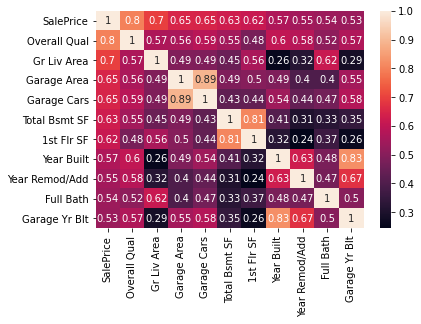

In [833]:
#heatmap between SalePrice to top_salePrice_corr
sns.heatmap(top_salePrice_corr.corr(), annot=True)

___
Base on this new heatmap that only correlates between the top 50% vs. Sale Price, this shows that there are other combination that can be considered to look into to use Feature Engineer to create new columns to consider

[^ Return to Contents](#Contents:)

# Data Cleaning
___
Now having an idea what to look into to get a better gauge of what to look out for, lets see if there are any improvement after cleaning the data
___

In [834]:
#change column format to better code
train_df.columns = train_df.columns.str.replace(' ','')

In [835]:
#see sample of output
train_df.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [836]:
#find all the notable nulls
train_df.isnull().sum()

Id                  0
PID                 0
MSSubClass          0
MSZoning            0
LotFrontage       330
LotArea             0
Street              0
Alley            1911
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         22
MasVnrArea         22
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           55
BsmtCond           55
BsmtExposure       58
BsmtFinType1       55
BsmtFinSF1          1
BsmtFinType2       56
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF  

## Dropping
___
From skimming the list of nulls, columns 'Alley', 'Pool QC', 'Fence', 'Fireplace Qu', and 'Misc Feature' will go through further examination to determine if it can be dropped.

In [837]:
#create a new instance of the train_df
new_train_df = train_df

In [838]:
#see the types of uniqueness of the column
new_train_df['Alley'].value_counts(dropna=False)

NaN     1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [839]:
#see the types of uniqueness of the column
new_train_df['PoolQC'].value_counts(dropna=False)

NaN    2042
Gd        4
Fa        2
TA        2
Ex        1
Name: PoolQC, dtype: int64

In [840]:
#see the types of uniqueness of the column
new_train_df['Fence'].value_counts(dropna=False)

NaN      1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [841]:
#see the types of uniqueness of the column
new_train_df['FireplaceQu'].value_counts(dropna=False)

NaN    1000
Gd      523
TA      407
Fa       59
Ex       31
Po       31
Name: FireplaceQu, dtype: int64

In [842]:
#see the types of uniqueness of the column
new_train_df['MiscFeature'].value_counts(dropna=False)

NaN     1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: MiscFeature, dtype: int64

___
After comparing the given unique values from each column.  FirePlaceQC can be salvage by stating that the houses with a null value have no fireplace built within.  This can be a new unique value within FirePlaceQC.  As for others, there's too much information missing that may skew the result if tried to impliment a substitue value in.  Those will be dropped.
___

In [843]:
#create new dictionary for FireplaceQu
new_train_df['FireplaceQu'] = new_train_df['FireplaceQu'].fillna('NoFirePlace')

In [844]:
#drop all other null columns
new_train_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
new_train_df.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFirePlace,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NoFirePlace,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NoFirePlace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NoFirePlace,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [845]:
#check out info
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotFrontage    1721 non-null   float64
 5   LotArea        2051 non-null   int64  
 6   Street         2051 non-null   object 
 7   LotShape       2051 non-null   object 
 8   LandContour    2051 non-null   object 
 9   Utilities      2051 non-null   object 
 10  LotConfig      2051 non-null   object 
 11  LandSlope      2051 non-null   object 
 12  Neighborhood   2051 non-null   object 
 13  Condition1     2051 non-null   object 
 14  Condition2     2051 non-null   object 
 15  BldgType       2051 non-null   object 
 16  HouseStyle     2051 non-null   object 
 17  OverallQual    2051 non-null   int64  
 18  OverallC

## Null Values in LotFrontage
___


In [846]:
#see the NaNs in lot frontage
new_train_df['LotFrontage'].value_counts(dropna=False)

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
90.0      31
74.0      31
64.0      31
72.0      30
68.0      28
62.0      28
73.0      25
100.0     23
82.0      21
52.0      20
57.0      20
43.0      20
66.0      19
79.0      19
59.0      18
53.0      18
67.0      18
76.0      16
88.0      16
51.0      16
56.0      15
55.0      14
84.0      14
69.0      14
81.0      14
92.0      13
71.0      13
40.0      13
58.0      13
91.0      13
35.0      13
44.0      12
30.0      11
48.0      11
96.0      11
41.0      11
77.0      11
95.0      11
34.0      11
83.0      10
61.0      10
110.0      9
105.0      9
93.0       9
107.0      9
87.0       8
120.0      8
42.0       8
45.0       8
94.0       8
86.0       7
98.0       7
102.0      7
89.0       6
37.0       6
54.0       6
47.0       6
32.0       6
103.0      5
36.0       5
39.0       4
109.0      4
38.0       4
108.0      4
97.0       4

**Observation:**
NaNs seem to be too highly represented for us to assume that we can simply replace all with 0.
City of Ames Municipal code does have regulations for minimum lot frontage.

Because the Lot Configuration has a close relationship with Lot Frontage. We can group them together to find a result to fill the null value.

In [847]:
#check the mean lot frontage for each category of lot configuration
new_train_df.groupby('LotConfig', as_index=False)[['LotFrontage']].mean()

,LotConfig,LotFrontage
0,Corner,83.245552
1,CulDSac,55.228571
2,FR2,60.836735
3,FR3,87.000000
4,Inside,66.952780


In [848]:
#check the median lot frontage for each category of lot configuration
new_train_df.groupby('LotConfig', as_index=False)[['LotFrontage']].median()

,LotConfig,LotFrontage
0,Corner,80.0
1,CulDSac,50.0
2,FR2,60.0
3,FR3,80.0
4,Inside,66.0


The values are quite different for each grouping. The median will be selected, since it is less sensitive to outliers.

In [849]:
#fill in the NaN with the mean value of Lot Frontage
#new_train_df['LotFrontage'] = new_train_df['LotFrontage'].fillna(new_train_df['LotFrontage'].median())

new_train_df.loc[(new_train_df['LotFrontage'].isna()) & (new_train_df['LotConfig'] == 'Corner'), 'LotFrontage'] = 80
new_train_df.loc[(new_train_df['LotFrontage'].isna()) & (new_train_df['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 50
new_train_df.loc[(new_train_df['LotFrontage'].isna()) & (new_train_df['LotConfig'] == 'FR2'), 'LotFrontage'] = 60
new_train_df.loc[(new_train_df['LotFrontage'].isna()) & (new_train_df['LotConfig'] == 'FR3'), 'LotFrontage'] = 80.0
new_train_df.loc[(new_train_df['LotFrontage'].isna()) & (new_train_df['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.0

In [850]:
#confirm there is no more null value for LotFrontage
new_train_df['LotFrontage'].isnull().sum()

0

### Null Values in MasVnrArea and MasVnrType

In [851]:
#check the number of unique value in MasVnrType, including null value
new_train_df['MasVnrArea'].value_counts(dropna=False)

0.0       1216
NaN         22
120.0       11
176.0       10
200.0       10
210.0        9
108.0        9
180.0        9
16.0         9
72.0         9
132.0        8
40.0         8
186.0        7
144.0        7
170.0        7
84.0         6
203.0        6
178.0        6
128.0        6
60.0         6
140.0        6
256.0        6
340.0        6
168.0        5
174.0        5
44.0         5
160.0        5
164.0        5
320.0        5
302.0        5
288.0        5
272.0        5
76.0         5
143.0        5
216.0        5
112.0        5
106.0        5
300.0        5
252.0        5
260.0        5
360.0        5
148.0        5
504.0        5
145.0        5
336.0        4
513.0        4
80.0         4
242.0        4
196.0        4
456.0        4
270.0        4
240.0        4
130.0        4
50.0         4
68.0         4
246.0        4
183.0        4
126.0        4
172.0        4
30.0         4
192.0        4
136.0        4
232.0        4
42.0         3
306.0        3
275.0        3
165.0     

In [852]:
#check the number of unique value in MasVnrType, including null value
new_train_df['MasVnrType'].value_counts(dropna=False)

None       1218
BrkFace     630
Stone       168
NaN          22
BrkCmn       13
Name: MasVnrType, dtype: int64

In [853]:
#to confirm there is a relationship between the two
new_train_df[new_train_df['MasVnrArea'].isna()].equals(new_train_df[new_train_df['MasVnrType'].isna()])

True

In [854]:
#convert the null value to None value because it has the biggest percentage 
new_train_df['MasVnrType'] = new_train_df['MasVnrType'].replace(np.nan, 'None')

In [855]:
#convert the null value to zero value because it has the biggest percentage
new_train_df['MasVnrArea'] = new_train_df['MasVnrArea'].replace(np.nan, 0.0)

In [856]:
#confirm there is no more null value for LotFrontage
new_train_df['MasVnrArea'].isnull().sum()

0

In [857]:
#confirm there is no more null value for LotFrontage
new_train_df['MasVnrType'].isnull().sum()

0

### Null Values in Basement
___
Since **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, and TotalBsmtSF** columns are all related to basement, it would be easier to find out what unique values each have and group it together to do the null value replacement as a function.

In [858]:
#defining the unique values in column
new_train_df['BsmtQual'].value_counts(dropna=False)

TA     887
Gd     864
Ex     184
Fa      60
NaN     55
Po       1
Name: BsmtQual, dtype: int64

In [859]:
#defining the unique values in column
new_train_df['BsmtCond'].value_counts(dropna=False)

TA     1834
Gd       89
Fa       65
NaN      55
Po        5
Ex        3
Name: BsmtCond, dtype: int64

In [860]:
#defining the unique values in column
new_train_df['BsmtExposure'].value_counts(dropna=False)

No     1339
Av      288
Gd      203
Mn      163
NaN      58
Name: BsmtExposure, dtype: int64

In [861]:
#defining the unique values in column
new_train_df['BsmtFinType1'].value_counts(dropna=False)

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: BsmtFinType1, dtype: int64

In [862]:
#defining the unique values in column
new_train_df['BsmtFinSF1'].value_counts(dropna=False, ascending=False)

0.0       657
24.0       17
16.0       10
300.0       7
384.0       7
20.0        7
700.0       6
368.0       6
312.0       6
360.0       6
624.0       6
456.0       6
648.0       5
625.0       5
432.0       5
1200.0      5
330.0       5
686.0       5
288.0       5
120.0       5
637.0       5
553.0       5
276.0       5
507.0       4
528.0       4
425.0       4
450.0       4
104.0       4
732.0       4
1218.0      4
758.0       4
904.0       4
476.0       4
350.0       4
588.0       4
836.0       4
549.0       4
375.0       4
495.0       4
626.0       4
784.0       4
56.0        4
547.0       4
252.0       4
544.0       4
410.0       4
851.0       4
338.0       4
500.0       4
247.0       4
319.0       4
600.0       4
468.0       4
510.0       4
336.0       4
28.0        4
841.0       4
60.0        3
550.0       3
612.0       3
494.0       3
522.0       3
234.0       3
778.0       3
560.0       3
490.0       3
674.0       3
400.0       3
299.0       3
1059.0      3
988.0       3
516.0 

In [863]:
#defining the unique values in column
new_train_df['BsmtFinType2'].value_counts(dropna=False)

Unf    1749
Rec      80
LwQ      60
NaN      56
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFinType2, dtype: int64

In [864]:
#defining the unique values in column
new_train_df['BsmtUnfSF'].value_counts(dropna=False, ascending=False)

0.0       165
384.0      14
672.0      11
728.0      10
816.0       9
216.0       9
280.0       8
624.0       8
162.0       8
600.0       8
300.0       7
480.0       7
768.0       7
292.0       7
163.0       6
326.0       6
324.0       6
125.0       6
264.0       6
832.0       6
319.0       6
572.0       6
432.0       6
100.0       6
80.0        6
336.0       6
190.0       6
348.0       6
847.0       5
186.0       5
698.0       5
780.0       5
276.0       5
195.0       5
250.0       5
294.0       5
676.0       5
747.0       5
120.0       5
684.0       5
252.0       5
426.0       5
660.0       5
448.0       5
738.0       5
576.0       5
630.0       5
140.0       4
322.0       4
312.0       4
396.0       4
180.0       4
192.0       4
76.0        4
224.0       4
970.0       4
316.0       4
232.0       4
356.0       4
90.0        4
350.0       4
160.0       4
1008.0      4
282.0       4
390.0       4
410.0       4
456.0       4
354.0       4
108.0       4
686.0       4
175.0       4
815.0 

In [865]:
#defining the unique values in column
new_train_df['TotalBsmtSF'].value_counts(dropna=False, ascending=False)

0.0       54
864.0     51
1040.0    20
672.0     20
816.0     17
912.0     17
768.0     14
1008.0    14
728.0     14
384.0     13
600.0     13
756.0     12
960.0     11
894.0     10
936.0     10
624.0     10
780.0     10
988.0     10
832.0     10
483.0     10
546.0      9
720.0      9
848.0      9
896.0      8
952.0      8
630.0      8
928.0      8
784.0      7
876.0      7
1092.0     7
1073.0     7
990.0      7
738.0      7
796.0      7
884.0      7
855.0      7
1362.0     6
1054.0     6
1080.0     6
1405.0     6
1057.0     6
660.0      6
725.0      6
840.0      6
845.0      6
572.0      6
1200.0     6
970.0      6
926.0      6
910.0      6
698.0      6
948.0      5
686.0      5
1050.0     5
1440.0     5
1800.0     5
925.0      5
793.0      5
1494.0     5
847.0      5
1143.0     5
1168.0     5
808.0      5
680.0      5
1100.0     5
1152.0     5
684.0      5
924.0      5
1056.0     5
976.0      5
880.0      5
858.0      5
1208.0     5
1078.0     5
520.0      5
747.0      5
732.0      5

In [866]:
#defining the unique values in column
new_train_df['BsmtFullBath'].value_counts(dropna=False)

0.0    1200
1.0     824
2.0      23
NaN       2
3.0       2
Name: BsmtFullBath, dtype: int64

In [867]:
#defining the unique values in column
new_train_df['BsmtHalfBath'].value_counts(dropna=False)

0.0    1923
1.0     122
2.0       4
NaN       2
Name: BsmtHalfBath, dtype: int64

In [868]:
#create column list for numerical and string 
bsmt_num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'\
           , 'BsmtFullBath', 'BsmtHalfBath']
bsmt_str = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'\
            ,'BsmtFinType2']

In [869]:
#for loop to replace null value to zero value within number value
for number in bsmt_num:
    new_train_df[number] = new_train_df[number].replace(np.nan, 0)

___
**'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', and 'BsmtFinType2'**  can have the same principle like what was done with LotFrontage.  A deeper studying needs to be done
___

In [870]:
new_train_df[new_train_df.loc[:, new_train_df.isna().any()].select_dtypes(include='object').columns].isna().sum()

BsmtQual         55
BsmtCond         55
BsmtExposure     58
BsmtFinType1     55
BsmtFinType2     56
GarageType      113
GarageFinish    114
GarageQual      114
GarageCond      114
dtype: int64

In [871]:
#find the null difference
new_train_df[(new_train_df['BsmtExposure'].isna()) & (new_train_df['BsmtQual'].notna())]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


In [872]:
#drop the three above rows
new_train_df.drop(new_train_df[(new_train_df['BsmtExposure'].isna()) & (new_train_df['BsmtQual'].notna())].index, inplace=True)

In [873]:
#find the null difference for BsmtFinType2
new_train_df[(new_train_df['BsmtFinType2'].isna()) & (new_train_df['BsmtQual'].notna())]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,284000


In [874]:
#drop the above rows
new_train_df.drop(new_train_df[(new_train_df['BsmtFinType2'].isna()) & (new_train_df['BsmtQual'].notna())].index, inplace=True)

In [875]:
#check the update
new_train_df[new_train_df.loc[:, new_train_df.isna().any()].select_dtypes(include='object').columns].isna().sum()

BsmtQual         55
BsmtCond         55
BsmtExposure     55
BsmtFinType1     55
BsmtFinType2     55
GarageType      113
GarageFinish    114
GarageQual      114
GarageCond      114
dtype: int64

In [876]:
#for loop to replace null value to NA value within string value
for string in bsmt_str:
    new_train_df[string] = new_train_df[string].replace(np.nan, 'NoBasement')

### Null Values in Garage

In [877]:
#defining the unique values in column
new_train_df['GarageYrBlt'].value_counts(dropna=False)

NaN       114
2005.0    104
2007.0     83
2006.0     80
2004.0     72
2003.0     65
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     39
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1950.0     32
1968.0     32
1958.0     32
1996.0     31
1956.0     31
1966.0     29
1965.0     27
2001.0     27
1997.0     26
1967.0     26
1995.0     26
1954.0     25
1975.0     25
1962.0     25
1979.0     25
1994.0     25
1964.0     25
1959.0     23
1992.0     22
1980.0     22
1963.0     22
1960.0     21
1920.0     21
1990.0     21
1961.0     20
1957.0     20
1973.0     20
1940.0     20
1930.0     20
1970.0     20
1974.0     19
1953.0     19
1969.0     18
1971.0     18
1972.0     17
2009.0     17
1987.0     16
1939.0     16
1955.0     15
1948.0     14
1988.0     14
1985.0     12
1951.0     12
1989.0     12
1981.0     11
1984.0     11
1986.0     10
1945.0     10
1949.0     10
1952.0     10
1991.0     10
1941.0     10
1926.0      8
1935.0      7
1983.0      7
1936.0      7
1925.0

In [878]:
new_train_df['GarageYrBlt'].describe()

count    1933.000000
mean     1978.654941
std        25.440680
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

___
When investigating through to find null value(s), a value '2207' was found.  After investgating further, it can be assumed that the year was keyed incorrectly. To fix this, the year '2207' will be replaced with '2007'.  Reason is to associate the year that the house was built.
___

In [879]:
#find which index does the 'GarageYrBlt' of '2207' belong to
new_train_df[new_train_df['GarageYrBlt']==2207]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0,9,2007,New,267300


In [880]:
#replace '2207' with '2007'
new_train_df.loc[1699, 'GarageYrBlt']=2007

In [881]:
#check if it has changed
new_train_df['GarageYrBlt'].loc[1699:1699]

1699    2007.0
Name: GarageYrBlt, dtype: float64

In [882]:
#defining the unique values in column
new_train_df['GarageCars'].value_counts(dropna=False)

2.0    1134
1.0     524
3.0     261
0.0     113
4.0      13
NaN       1
5.0       1
Name: GarageCars, dtype: int64

In [883]:
#defining the unique values in column
new_train_df['GarageArea'].value_counts(dropna=False)

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
240.0      45
400.0      43
288.0      43
480.0      39
264.0      33
308.0      32
280.0      24
504.0      18
420.0      18
336.0      18
462.0      17
672.0      17
216.0      16
312.0      16
572.0      15
624.0      14
180.0      14
384.0      13
550.0      13
506.0      13
478.0      13
564.0      12
525.0      12
660.0      12
352.0      12
300.0      11
720.0      11
286.0      10
360.0      10
540.0      10
495.0       9
542.0       9
297.0       9
588.0       9
270.0       8
470.0       8
450.0       8
520.0       8
460.0       8
578.0       8
472.0       8
482.0       8
390.0       8
539.0       8
432.0       8
560.0       7
200.0       7
461.0       7
490.0       7
529.0       7
294.0       7
431.0       7
546.0       6
530.0       6
552.0       6
474.0       6
502.0       6
252.0       6
441.0       6
392.0       6
473.0       6
616.0       6
393.0       6
430.0       6
676.0       6
786.0       5
527.0 

In [884]:
#create a list
garage_num = ['GarageYrBlt', 'GarageCars', 'GarageArea' ]

#create a for loop and replace null values with '0'
#for loop to replace null value to zero value within numerial value
for number in garage_num:
    new_train_df[number] = new_train_df[number].replace(np.nan, 0)

___
Using the same principle for basement but for garage. Instead of **NoBasement**, it'll be called **NoGarage**
___

In [885]:
#find the null difference
new_train_df[(new_train_df['GarageFinish'].isna()) & (new_train_df['GarageType'].notna())]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Detchd,0.0,NaN,0.0,0.0,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [886]:
#find the null difference
new_train_df[(new_train_df['GarageQual'].isna()) & (new_train_df['GarageType'].notna())]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Detchd,0.0,NaN,0.0,0.0,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [887]:
#find the null difference
new_train_df[(new_train_df['GarageCond'].isna()) & (new_train_df['GarageType'].notna())]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFirePlace,Detchd,0.0,NaN,0.0,0.0,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [888]:
#drop the above rows
new_train_df.drop(new_train_df[(new_train_df['GarageFinish'].isna()) & (new_train_df['GarageType'].notna())].index, inplace=True)
new_train_df.drop(new_train_df[(new_train_df['GarageQual'].isna()) & (new_train_df['GarageType'].notna())].index, inplace=True)
new_train_df.drop(new_train_df[(new_train_df['GarageCond'].isna()) & (new_train_df['GarageType'].notna())].index, inplace=True)

In [889]:
#check the update
new_train_df[new_train_df.loc[:, new_train_df.isna().any()].select_dtypes(include='object').columns].isna().sum()

GarageType      113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [890]:
#create list
garage_cat_null = ['GarageType','GarageFinish','GarageQual','GarageCond']

#create for loop to replace null values to 'NoGarage'
for col in garage_cat_null: 
    new_train_df[col] = new_train_df[col].fillna('NoGarage')

In [891]:
#check to make sure there are no more null values left
new_train_df[new_train_df.loc[:, new_train_df.isna().any()].select_dtypes(include='object').columns].isna().sum()

Series([], dtype: float64)

In [892]:
#a complete check for any null values
new_train_df.isna().sum().sum()

0

## Converting Ordinal Data to Numerical 
___

In [893]:
#the list
#group columns that are string type
obj_cols = list(new_train_df.select_dtypes(include='object').columns)
print(obj_cols)
print('\n')
print(f"There are : {len(obj_cols)} string columns")

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


There are : 38 string columns


#### Breaking the string valued into ordinal and nominal data types

In [894]:
#make a list of relevant columns for ordinal
ord_col_cats = ['LotShape',
                'Utilities',
                'LandSlope',
                'ExterQual',
                'ExterCond',
                'BsmtQual',
                'BsmtCond',
                'BsmtExposure',
                'BsmtFinType1',
                'BsmtFinType2',
                'HeatingQC',
                'Electrical',
                'KitchenQual',
                'Functional',
                'FireplaceQu',
                'GarageFinish',
                'GarageQual',
                'GarageCond',
                'PavedDrive',]

In [895]:
#change the order of the ordial encoder
lot_shape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
utilities_cats = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
land_slope_cats = ['Sev', 'Mod', 'Gtl']
exter_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
exter_cond_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_qual_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_cond_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure_cats = ['NoBasement', 'No', 'Mn', 'Av', 'Gd']
bsmtfin_type1_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfin_type2_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heating_qc_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
electrical_cats = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
kitchen_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
functional_cats = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
fireplace_qu_cats = ['NoFirePlace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_finish_cats = ['NoGarage', 'Unf', 'RFn', 'Fin']
garage_qual_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_cond_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
paved_drive_cats = ['N', 'P', 'Y']

In [896]:
#map into a list
ord_category = [lot_shape_cats, 
                utilities_cats, 
                land_slope_cats, 
                exter_qual_cats, 
                exter_cond_cats, 
                bsmt_qual_cats, 
                bsmt_cond_cats, 
                bsmt_exposure_cats, 
                bsmtfin_type1_cats, 
                bsmtfin_type2_cats, 
                heating_qc_cats, 
                electrical_cats, 
                kitchen_qual_cats, 
                functional_cats,
                fireplace_qu_cats,
                garage_finish_cats, 
                garage_qual_cats, 
                garage_cond_cats, 
                paved_drive_cats]

In [897]:
#use OrdinalEncoder on the columns
ord_to_num = OrdinalEncoder(categories = ord_category)
new_train_df[ord_col_cats] = ord_to_num.fit_transform(new_train_df[ord_col_cats])

In [898]:
#check updated dataframe after OrdinalEncoder was applied
new_train_df.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,50.0,13517,Pave,1.0,Lvl,3.0,CulDSac,2.0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,4.0,Y,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,7.0,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,1.0,Lvl,3.0,CulDSac,2.0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,4.0,Y,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,7.0,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,2.0,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,2.0,Y,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,7.0,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,2.0,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0.0,Lvl,3.0,Inside,2.0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,3.0,Y,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,7.0,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,2.0,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,1.0,Lvl,3.0,Inside,2.0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,2.0,Y,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,7.0,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,0.0,0,59,0,0,0,0,0,3,2010,WD,138500


In [899]:
#make a list of relevant columns for categorical

nominal_col_cats = ['MSZoning',
 'Street',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Functional',
 'SaleType', 'GarageType']

In [900]:
new_train_df.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,50.0,13517,Pave,1.0,Lvl,3.0,CulDSac,2.0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,4.0,Y,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,7.0,0,0.0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,1.0,Lvl,3.0,CulDSac,2.0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,4.0,Y,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,7.0,1,3.0,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,2.0,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,2.0,Y,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,7.0,0,0.0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,2.0,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0.0,Lvl,3.0,Inside,2.0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,3.0,Y,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,7.0,0,0.0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,2.0,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,1.0,Lvl,3.0,Inside,2.0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,2.0,Y,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,7.0,0,0.0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,0.0,0,59,0,0,0,0,0,3,2010,WD,138500


In [901]:
#get dummies for nominal
full_num_train_df = pd.get_dummies(new_train_df, columns=nominal_col_cats, drop_first=False)

In [902]:
#check to see the dtypes
full_num_train_df.dtypes.value_counts()

uint8      159
float64     29
int64       28
dtype: int64

In [903]:
#convert the floats to int64
for col in full_num_train_df.columns:
    if full_num_train_df[col].dtypes == 'float64':
        full_num_train_df[col] = full_num_train_df[col].astype('int64')

In [904]:
#check again to see the dtypes
full_num_train_df.dtypes.value_counts()

uint8    159
int64     57
dtype: int64

In [905]:
full_num_train_df.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_0.0,Functional_1.0,Functional_2.0,Functional_3.0,Functional_4.0,Functional_5.0,Functional_6.0,Functional_7.0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,109,533352170,60,50,13517,1,3,2,6,8,1976,2005,289,3,2,3,3,1,6,533,1,0,192,725,4,4,725,754,0,1479,0,0,2,1,3,1,3,6,0,0,1976,2,2,475,3,3,2,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,544,531379050,60,43,11492,1,3,2,7,5,1996,1997,132,3,2,4,3,1,6,637,1,0,276,913,4,4,913,1209,0,2122,1,0,2,1,4,1,3,8,1,3,1997,2,2,559,3,3,2,

## Exporting Data
___
Once the file is completely cleaned. It can be exported for storage or future use.

In [906]:
full_num_train_df.to_csv('../Data/full number train dataframe.csv', index=False)

[^ Return to Contents](#Contents:)

# Old vs New: Top 10 Features
___
This is to do a quick comparison between the data before and after it was cleaned.  This brings a new light on what are the top features compared to Sale Price.

In [907]:
#see if there is a difference now with new dataframe
full_num_salePrice_corr = full_num_train_df.corr().SalePrice.sort_values(ascending = False)

#new top 10 features
full_num_salePrice_corr.head(11)

SalePrice      1.000000
OverallQual    0.800439
ExterQual      0.712052
GrLivArea      0.697411
KitchenQual    0.692474
GarageArea     0.650024
GarageCars     0.647909
TotalBsmtSF    0.630275
1stFlrSF       0.618629
BsmtQual       0.612227
YearBuilt      0.571658
Name: SalePrice, dtype: float64

In [908]:
#compare to the original top features that have >=0.5 correlated to the SalePrice uncleaned dataframe
salePrice_corr.head(11)

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Name: SalePrice, dtype: float64

___
**Observation:** Comparing between the two, about 70% of the previous features are still there after cleaning.  This shows a strong relation to how the sale price will change because of these features.

[^ Return to Contents](#Contents:)

# Feature Engineering
___
After searching on online realtor sites and watching real estate agents video tours on YouTube, most have the commonality of a few particular search filters.  Such as:

1. Overall Number of Bathrooms
2. Overall Square Footage
3. Overall Number of Bedrooms
4. Year Built
5. Lot Size
etc...

To make it more realistic to the how customers search on the sites, we will combine and create new columns as well as drop some too.
___

In [909]:
#new 'HouseAge' column
full_num_train_df['HouseAge'] = full_num_train_df['YrSold'] - full_num_train_df['YearBuilt']

In [910]:
#new 'RemodelAge' column
full_num_train_df['RemodelAge'] = full_num_train_df['YrSold'] - full_num_train_df['YearRemod/Add']

In [911]:
#new 'TotalBthrm' column
full_num_train_df['TotalBthrm'] = full_num_train_df['BsmtFullBath']+full_num_train_df['BsmtHalfBath']\
+full_num_train_df['FullBath']+full_num_train_df['HalfBath']

In [912]:
#new 'TotalSqFt' column
full_num_train_df['TotalSqFt'] = full_num_train_df['GrLivArea']+full_num_train_df['GarageArea']+\
full_num_train_df['FullBath']+full_num_train_df['HalfBath']

In [913]:
#new "GarageOverall" column
full_num_train_df['GarageOverall'] = full_num_train_df['GarageQual']+full_num_train_df['GarageCars']

In [914]:
#check to see if it is added
full_num_train_df.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_0.0,Functional_1.0,Functional_2.0,Functional_3.0,Functional_4.0,Functional_5.0,Functional_6.0,Functional_7.0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,HouseAge,RemodelAge,TotalBthrm,TotalSqFt,GarageOverall
0,109,533352170,60,50,13517,1,3,2,6,8,1976,2005,289,3,2,3,3,1,6,533,1,0,192,725,4,4,725,754,0,1479,0,0,2,1,3,1,3,6,0,0,1976,2,2,475,3,3,2,0,44,0,0,0,0,0,3,2010,130500,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,34,5,3,1957,5
1,544,531379050,60,43,11492,1,3,2,7,5,1996,1997,132,3,2,4,3,1,6,637,1,

In [915]:
#see if there is a difference now with new dataframe
full_num_salePrice_corr2 = full_num_train_df.corr().SalePrice.sort_values(ascending = False)

#new top 25 features
full_num_salePrice_corr2.head(26)

SalePrice               1.000000
OverallQual             0.800439
TotalSqFt               0.770596
ExterQual               0.712052
GrLivArea               0.697411
KitchenQual             0.692474
GarageArea              0.650024
GarageCars              0.647909
TotalBsmtSF             0.630275
1stFlrSF                0.618629
BsmtQual                0.612227
TotalBthrm              0.609697
YearBuilt               0.571658
GarageFinish            0.558273
YearRemod/Add           0.550275
FireplaceQu             0.538803
FullBath                0.538385
GarageOverall           0.532418
Foundation_PConc        0.528978
TotRmsAbvGrd            0.504040
MasVnrArea              0.503252
Fireplaces              0.471084
HeatingQC               0.458205
Neighborhood_NridgHt    0.448220
BsmtExposure            0.426901
BsmtFinSF1              0.424198
Name: SalePrice, dtype: float64

In [916]:
df_sel = full_num_train_df.loc[:,'SalePrice':]

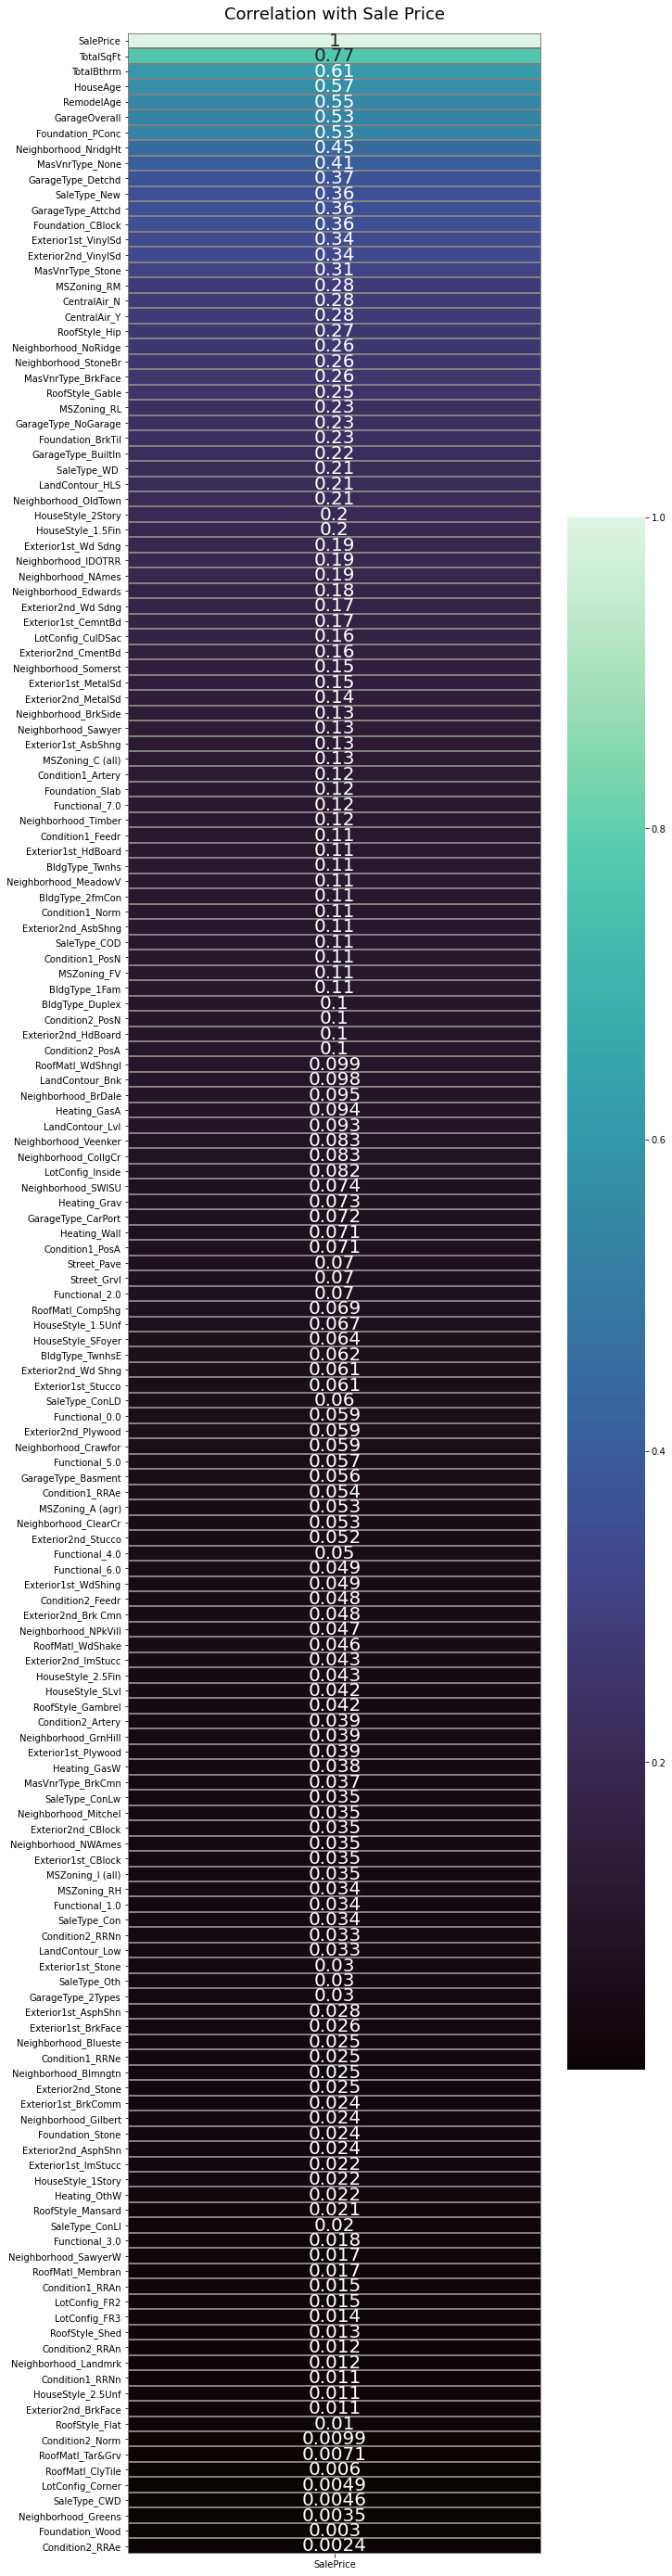

In [917]:
plt.figure(figsize=(10,50))
sns.heatmap(df_sel.corr()[['SalePrice']].abs().sort_values(by='SalePrice', ascending=False),
            annot=True,
            annot_kws={'size': 20},
            linewidths=1,
            linecolor='grey',
            cmap='mako').set_title('Correlation with Sale Price',
                                                          fontsize=18,
                                                          pad=15);

**Observation:**
___
Adding the new Feature Engineered columns shifted the top features compare to price.

## Truncate columns by dropping

### Drop the Outlier(s)

To reduce any skewed results, outliers will be dropped.

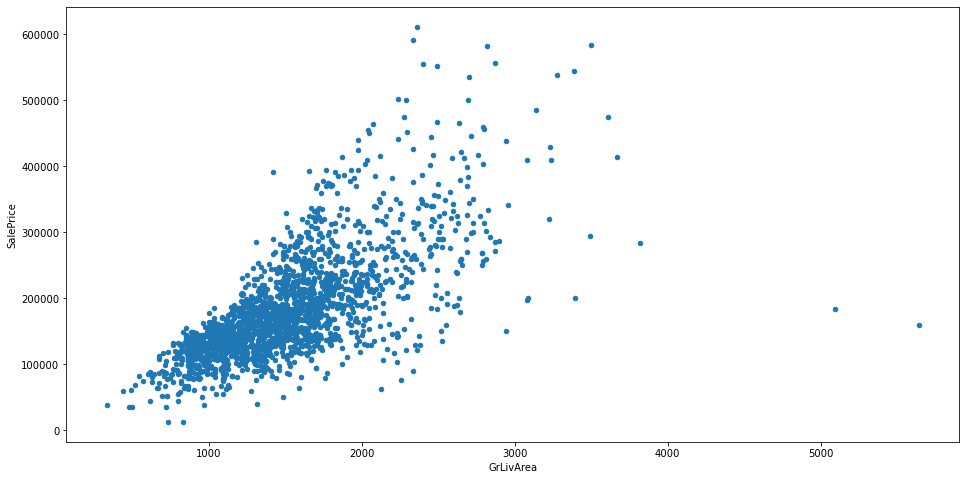

<Figure size 1152x576 with 0 Axes>

In [918]:
#scatter plot to find any outliers
full_num_train_df.plot.scatter(x = 'GrLivArea', y = 'SalePrice', figsize=(16,8))
plt.figure(figsize=(16,8));

As shown above, there are 2 outliers that will skew the result of the plot. To reduce that, the two outliers will be dropped.

In [919]:
#pull out any outlier(s) information
full_num_train_df[full_num_train_df['GrLivArea'] > 5000]

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_0.0,Functional_1.0,Functional_2.0,Functional_3.0,Functional_4.0,Functional_5.0,Functional_6.0,Functional_7.0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,HouseAge,RemodelAge,TotalBthrm,TotalSqFt,GarageOverall
960,1499,908154235,60,313,63887,3,3,2,10,5,2008,2008,796,4,2,5,3,4,6,5644,1,0,466,6110,4,4,4692,950,0,5642,2,0,2,1,3,1,4,12,3,4,2008,3,2,1418,3,3,2,214,292,0,0,0,480,0,1,2008,160000,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5,7063,5
1885,2181,908154195,20,128,39290,1,3,2,10,5,2008,2009,12

In [920]:
#drop the outliers
full_num_train_df.drop(full_num_train_df[full_num_train_df['GrLivArea'] > 5000].index, inplace=True)

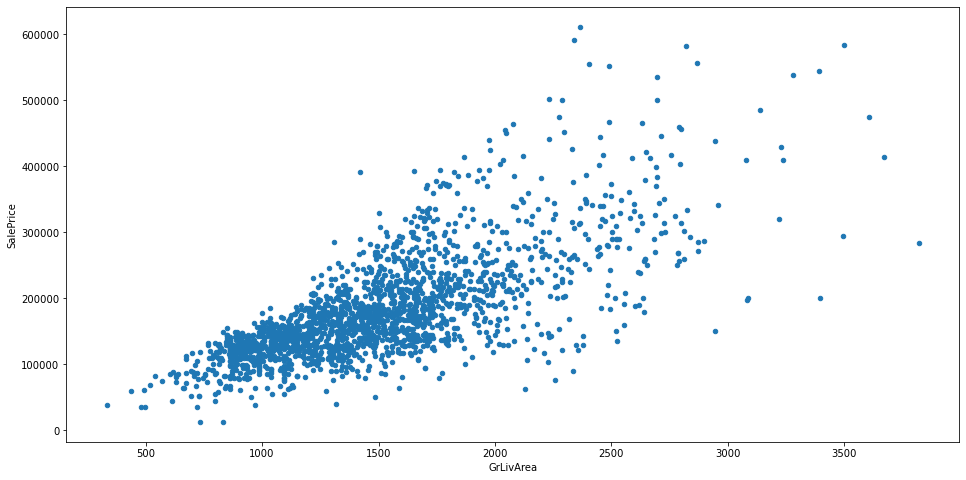

<Figure size 1152x576 with 0 Axes>

In [921]:
#see update
full_num_train_df.plot.scatter(x = 'GrLivArea', y = 'SalePrice', figsize=(16,8))
plt.figure(figsize=(16,8));

### Drop low correlation columns
___
To focus on the problems that were stated at the beginning, we will drop any columns that are less than or equal to 0.45 with the Sale Price. Reason for this is to remove any features that are unrelated to the problem or does not play any factor to the overall result.  

In [922]:
#create new Sale Price coor instance 
new_saleprice_corr = full_num_train_df.corr()['SalePrice'].abs()

#see output
new_saleprice_corr.sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.803703
TotalSqFt               0.793067
GrLivArea               0.719855
ExterQual               0.714961
KitchenQual             0.694436
TotalBsmtSF             0.666621
GarageArea              0.655254
1stFlrSF                0.648461
GarageCars              0.648356
BsmtQual                0.613276
TotalBthrm              0.612244
HouseAge                0.572271
YearBuilt               0.572215
GarageFinish            0.559000
RemodelAge              0.552189
YearRemod/Add           0.550779
FireplaceQu             0.539362
FullBath                0.538643
GarageOverall           0.532619
Foundation_PConc        0.529431
MasVnrArea              0.510948
TotRmsAbvGrd            0.509802
Fireplaces              0.473775
HeatingQC               0.458487
Neighborhood_NridgHt    0.448213
BsmtFinSF1              0.446508
BsmtExposure            0.428176
MasVnrType_None         0.411277
GarageType_Detchd       0.370079
SaleType_N

In [923]:
#create a list of columns that have a coorelation value of less than or equal of 0.45
low_coor_drop = list(new_saleprice_corr[new_saleprice_corr<=.45].index)

In [924]:
#total number of columns
print(f"Total number of columns is: {len(new_saleprice_corr)}")

Total number of columns is: 221


In [925]:
#total number of need to drop columns
print(f"Total number of columns to drop is: {len(low_coor_drop)}")

Total number of columns to drop is: 195


In [926]:
#drop columns
dropped_low_coor = full_num_train_df.drop(columns=low_coor_drop)

#leftover columns
len(dropped_low_coor.columns)

26

[^ Return to Contents](#Contents:)

# Data Dictionary
___
The dictionary table below represents the only columns that are left from the total number of columns.

### Dictionary Key:
___

   |Feature|Type|Dataset|Description|
|- | -|- | -|
|**OverallQual**|integer|full_num_train_df|Rates the overall material and finish of the house|
|**YearBuilt**|integer|full_num_train_df|Original construction date|
|**YearRemod/Add**|integer|full_num_train_df|Remodel date|
|**MasVnrArea**|integer|full_num_train_df|Masonry veneer type|
|**ExterQual**|integer|full_num_train_df|Evaluates the quality of the material on the exterior|
|**BsmtQual**|integer|full_num_train_dfn|Evaluates the height of the basement|
|**TotalBsmtSF**|integer|full_num_train_df|Evaluates the total square footage of the basement| 
|**HeatingQC**|integer|full_num_train_df|Heating quality and condition|
|**1stFlrSF**|integer|full_num_train_df|First Floor square feet|
|**GrLivArea**|integer|full_num_train_df|Above grade (ground) living area square feet| 
|**FullBath**|integer|full_num_train_df|Full bathrooms above grade| 
|**KitchenQual**|integer|full_num_train_df|Kitchen quality|
|**TotRmsAbvGrd**|integer|full_num_train_df|Total rooms above grade (does not include bathrooms)|
|**Fireplaces**|integer|full_num_train_df|Number of fireplaces|
|**GarageFinish**|integer|full_num_train_df|Interior finish of the garage|
|**GarageCars**|integer|full_num_train_df|Size of garage in car capacity|
|**GarageArea**|integer|full_num_train_df|Size of garage in square feet|
|**SalePrice**|integer|full_num_train_dfn|The price of unit|
|**Foundation_PConc**|integer|full_num_train_df|Type of foundation|
|**HouseAge**|integer|full_num_train_df|The age of the house|
|**RemodelAge**|integer|full_num_train_df|The age of the house after remodelled|
|**TotalBthrm**|integer|full_num_train_df|The total number of bathrooms in the unit|
|**TotalSqFt**|integer|full_num_train_df|The total square feet of the unit|
|**GarageOverall**|integer|full_num_train_df|The overall square footage of the garage space|


___

[^ Return to Contents](#Contents:)

# Multicollinearity
___

Checking multicollinearity to make sure that if there are any, it should be resolved.  This is to reduce any irregularity within the results.  We set the threshold as: correlations between features with r > 0.8 are of concern to us.

In [927]:
#create an instance for correlation matrix (absolute values)
trainCorr = full_num_train_df.corr().abs()

#drop the row and column for 'SalePrice' as we only want to study the features
trainCorr.drop(labels='SalePrice', axis=0, inplace=True)
trainCorr.drop(labels='SalePrice', axis=1, inplace=True)

#create a mask for the upper triange
upperTri = np.triu(np.ones_like(trainCorr, dtype=bool))

#masked correlation matrix
trainCorr = trainCorr.mask(upperTri)

#reshape the correlation matrix into a stacked format
corrList = trainCorr.mask(upperTri).stack().sort_values(ascending=False)

#convert the stacked data into a DataFrame
corrList = pd.DataFrame(corrList).reset_index()

#name the columns of the created DataFrame
corrList.columns = 'feature_1', 'feature_2', '1_2_abs_corr'

#get only the pairwise correlations that meet the specified condition
corrList = corrList[corrList['1_2_abs_corr'] > 0.8]

In [928]:
# Generate the correlation of the features in the list to the target variable
for row in corrList.index:
    corrList.loc[row, '1_y_corr'] = full_num_train_df.corr().abs()['SalePrice'][corrList.loc[row, 'feature_1']]
    corrList.loc[row, '2_y_corr'] = full_num_train_df.corr().abs()['SalePrice'][corrList.loc[row, 'feature_2']]  
    
#show correlation table
corrList

,feature_1,feature_2,1_2_abs_corr,1_y_corr,2_y_corr
0,Street_Pave,Street_Grvl,1.000000,0.069833,0.069833
1,CentralAir_Y,CentralAir_N,1.000000,0.277344,0.277344
2,HouseAge,YearBuilt,0.999055,0.572271,0.572215
3,GarageType_NoGarage,GarageYrBlt,0.998570,0.230944,0.258617
4,RemodelAge,YearRemod/Add,0.998054,0.552189,0.550779
5,Exterior2nd_CmentBd,Exterior1st_CemntBd,0.988253,0.158045,0.168622
6,Exterior2nd_VinylSd,Exterior1st_VinylSd,0.977470,0.336727,0.341324
7,Exterior2nd_MetalSd,Exterior1st_MetalSd,0.976445,0.139103,0.149620
8,YrSold,Id,0.975747,0.016121,0.050364
9,GarageCond,GarageYrBlt,0.954578,0.265190,0.258617


___
**Observation:** 
It's all dummy variables. Will leave as it is. Expected from OHE. Can it be safely ignored? This link says yes https://statisticalhorizons.com/multicollinearity.
___

## HeatMap of the condensed correlation matrix

In [929]:
dropped_low_coor.drop('RoofMatl_ClyTile', axis=1, inplace=True)

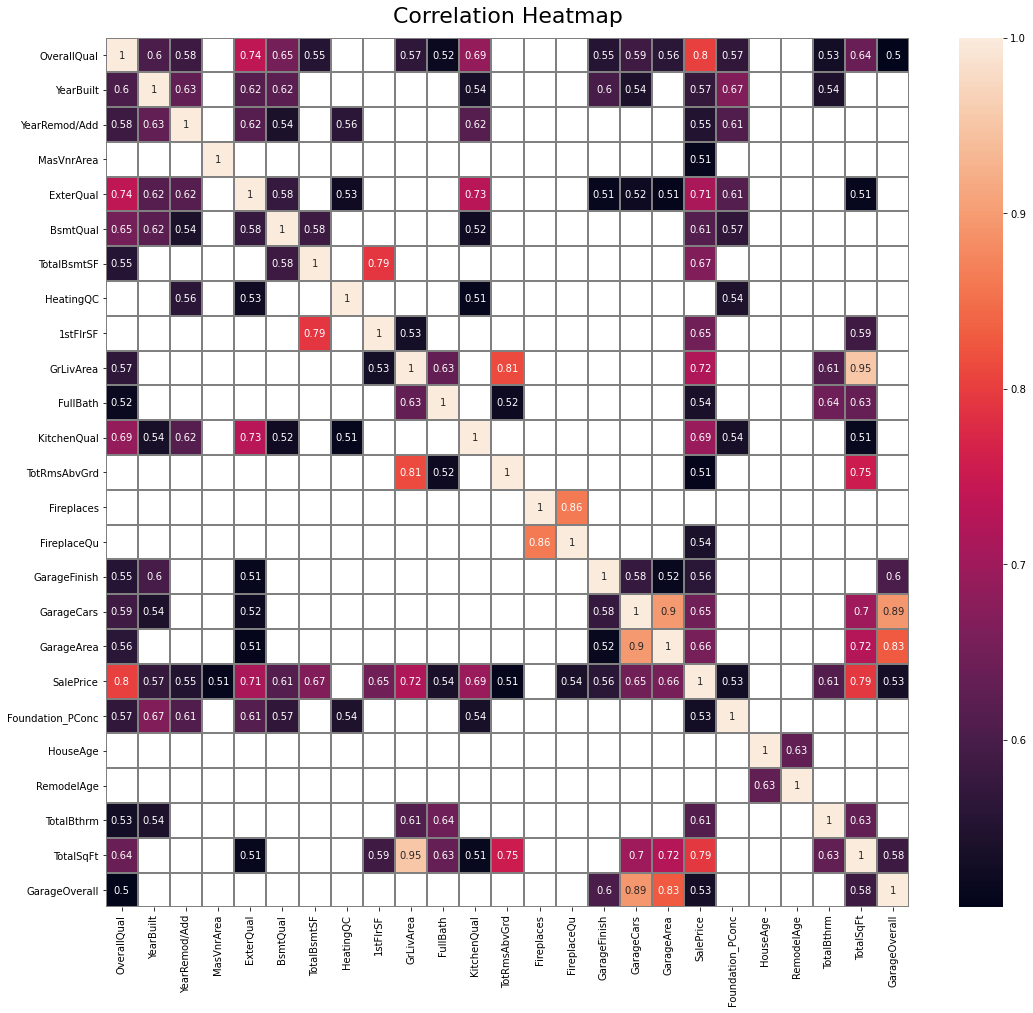

In [930]:
#create a filtered heatmap
plt.figure(figsize=(18,16))
sns.heatmap(dropped_low_coor.corr(),
            annot=True,
            linewidths=1,
            linecolor='grey',
            mask = (dropped_low_coor.corr() <= 0.5)).set_title('Correlation Heatmap',fontsize=22,pad=15);


**Observation:**
___
The above heatmap only shows the coorelation between new filtered features and Sale Price.  Base on what is shown, there are a few things that can be combine as a new Feature Engineer column

[^ Return to Contents](#Contents:)

# EDA - Exploratory Data Analysis

## Sale Price

See the distrubtion of SalePrice

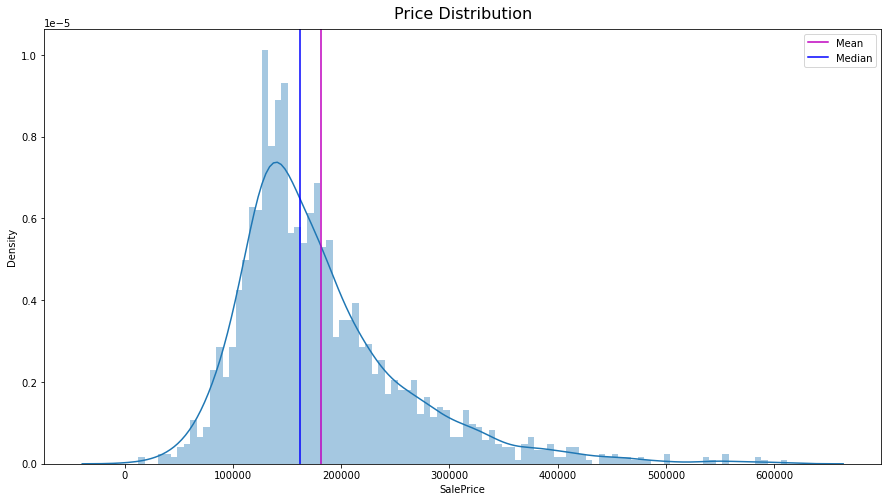

In [931]:
plt.figure(figsize=(15, 8))
sns.distplot(dropped_low_coor['SalePrice'], bins=100, kde=True)
title = plt.title("Price Distribution", y=1.01, fontsize=16)
plt.axvline(x=dropped_low_coor["SalePrice"].mean(),color="m",label="Mean")
plt.axvline(x=dropped_low_coor["SalePrice"].median(),color="b",label="Median")
plt.legend(loc='upper right');

In [932]:
#because the distribution is skewed towards the right. Let's see what the skew is
print(f"Skew value is: {dropped_low_coor['SalePrice'].skew()}")

Skew value is: 1.5589203077946698


In [933]:
# Find out more about the distribution of sale price
dropped_low_coor[['SalePrice']].describe().round(2)

,SalePrice
count,2044.00
mean,181403.86
std,79349.36
min,12789.00
25%,129500.00
50%,162250.00
75%,214000.00
max,611657.00


___
**Observation:** The mean 'saleprice' is 181403.86, with a standard deviation of 79349.36. The distribution of 'saleprice' is skewed to the right. The tail ends of the distribution curve indicates low frequency of the value and is indicative of outliers. Hence we will have to remove them in order to get a more accurate prediction in later stages.
___

## Top Features: Deep Dive
___
Looking deeper into few of the top features compare to Sale Price.

### Pair Plots
___
Pair Plots allow us to visualize the correlation between all combinations. It also allows us to see other possibilities that we can use as new feature engineered columns

In [934]:
#create X and y
#to reduce the loading time to create the pairplot, the top 10 features will be taken from the overall

#top 10 features compared to Sale Price
FEATURES = ['OverallQual','TotalSqFt','GrLivArea','ExterQual','KitchenQual','TotalBsmtSF','GarageArea','1stFlrSF',\
            'GarageCars','BsmtQual']
X = dropped_low_coor[FEATURES]
y = dropped_low_coor['SalePrice']

# Verify dimensions
#print('X: ', X.shape)
#print('y: ', y.shape)

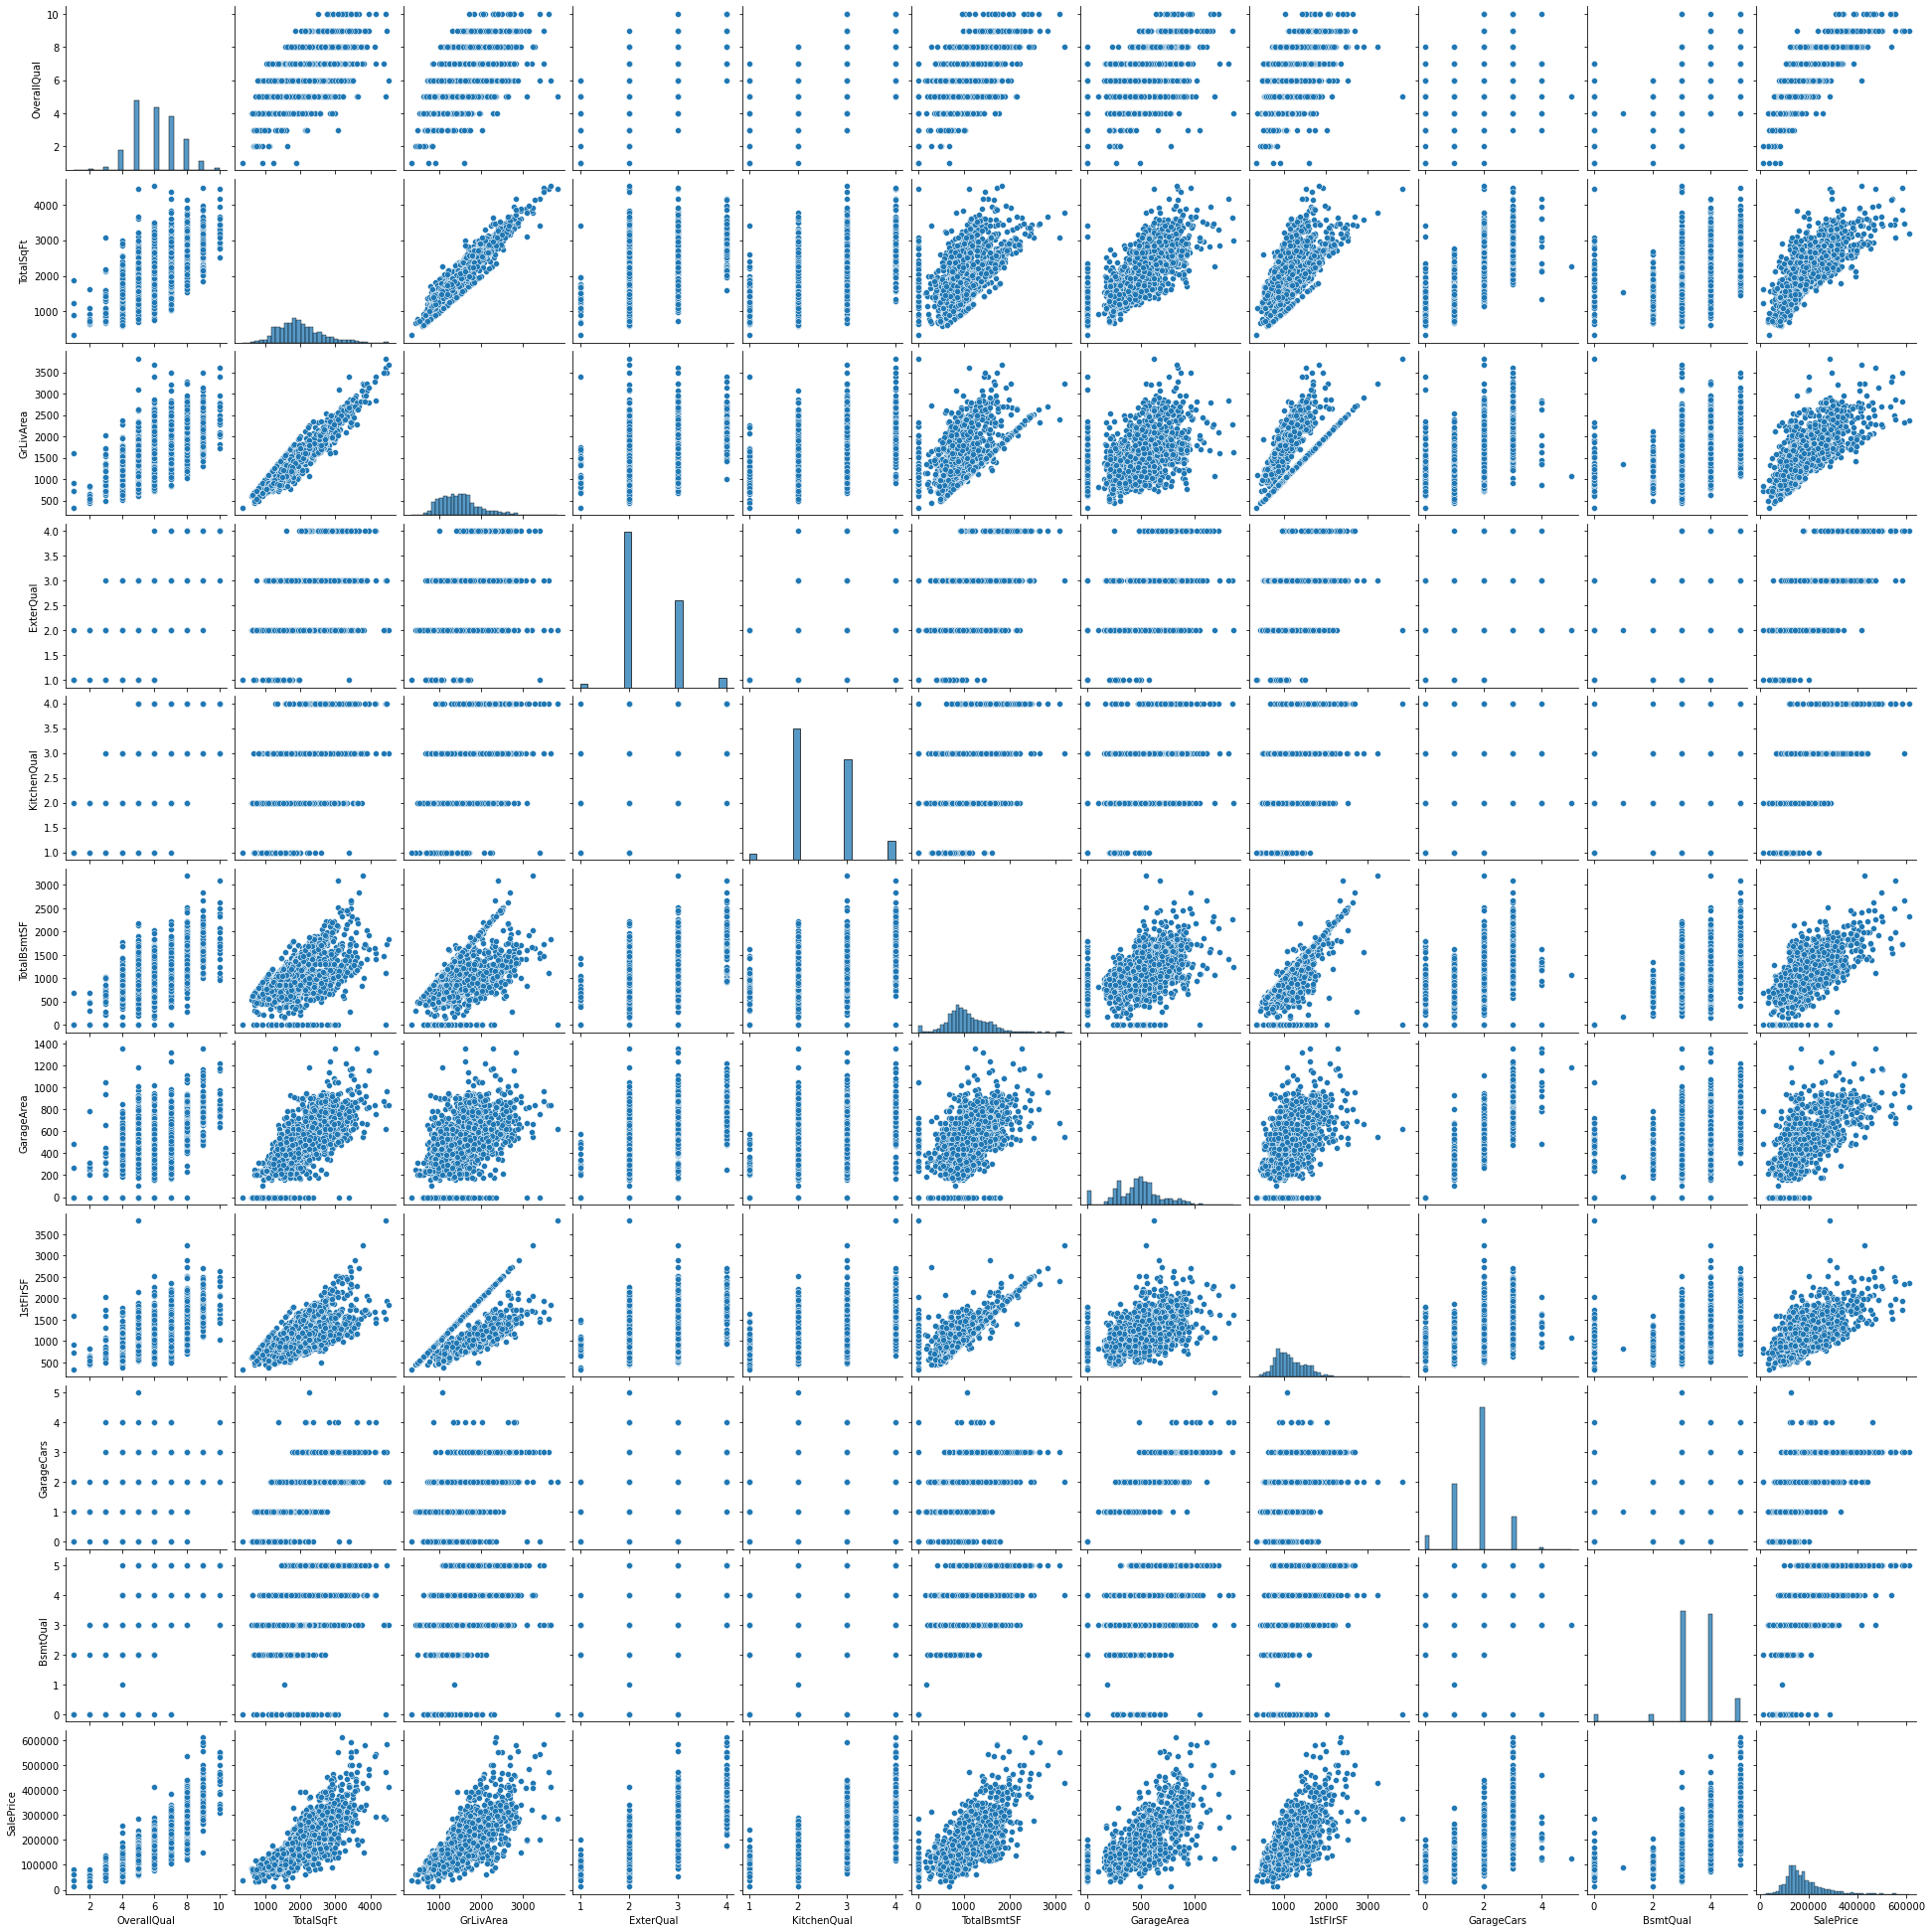

In [935]:
# some linear relationships
sns.pairplot(pd.merge(X, y, left_index = True, right_index = True));

### Overall Quality

Overall quality is the top feature in the analysis. Let's plot it out to see what we can find out.

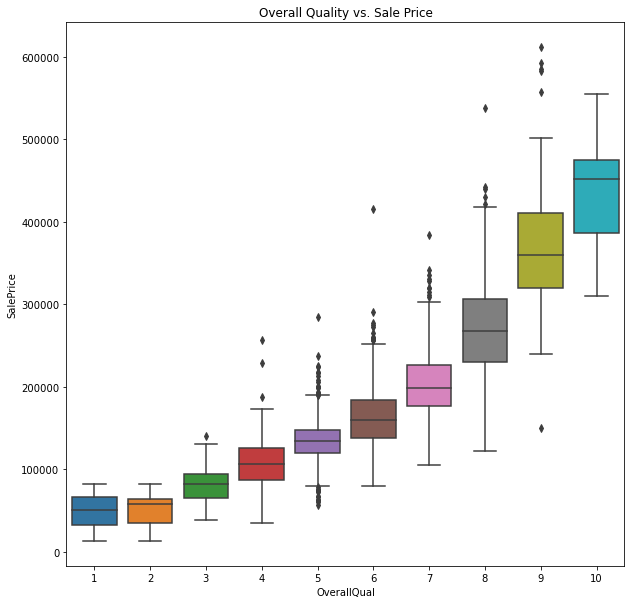

In [936]:
plt.figure(figsize=(10,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=dropped_low_coor)
title = plt.title("Overall Quality vs. Sale Price")

___
**Observation**
From the box plot above, we can tell that the house price will increase with as the quality of the house reaches to perfection.
___

### Total Square Footage
___
Having an ambient amount of space is something everyone wants.  This is the reason why it is the second most wanted feature compare to Sale Price.

Correlation:  0.7930671792385179


<Figure size 720x720 with 0 Axes>

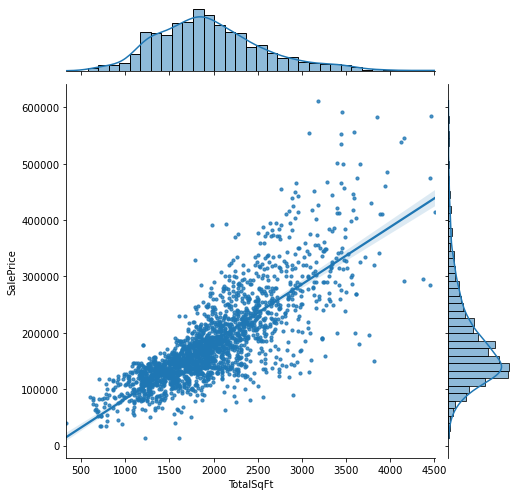

In [937]:
def plotTotSqFt(variables):
    
    #1. Print correlation of two variables
    # Print correlation
    print("Correlation: ", full_num_train_df[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])
    
    #2. Create jointplot of two variables
    # Create jointplot
    plt.figure(figsize=(10, 10))
    sns.jointplot(full_num_train_df[(variables[0])],\
                  full_num_train_df[(variables[1])],\
                  kind='reg',\
                  height=7,\
                  scatter_kws={'s': 10},\
                  marginal_kws={'kde': True})


plotTotSqFt(['TotalSqFt', 'SalePrice'])

___
**Observation:**
As predicted, with an increase amount of square footage, price point will increase as well.  Although there are a few outliers that skewed the result.
___

### Living Area
___
General Living Area is the third most wanted feature compare to Sale Price

Correlation:  0.7198550201274404


<Figure size 720x720 with 0 Axes>

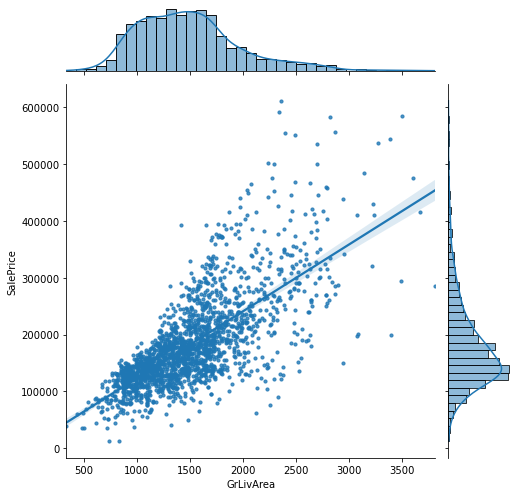

In [938]:
def plotLivingArea(variables):
    
    #1. Print correlation of two variables
    # Print correlation
    print("Correlation: ", full_num_train_df[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])
    
    #2. Create jointplot of two variables
    # Create jointplot
    plt.figure(figsize=(10, 10))
    sns.jointplot(full_num_train_df[(variables[0])],\
                  full_num_train_df[(variables[1])],\
                  kind='reg',\
                  height=7,\
                  scatter_kws={'s': 10},\
                  marginal_kws={'kde': True})


plotLivingArea(['GrLivArea', 'SalePrice'])

___
**Observation:**
The living area has a linear relation to the sale price.  As shown above, as the living area increase in size, the price of the house increase as well.
___

[^ Return to Contents](#Contents:)

# Modelling
___

## Prep: Train/Test Split
___

In [939]:
#create instances for data
X = dropped_low_coor.drop('SalePrice', axis=1)
y = full_num_train_df['SalePrice']

#formulate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Prep: Scaling
___

In [940]:
#Scaling because of Lasso and Ridge
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Prep: Instantiate
___

In [941]:
# instantiate
lr = LinearRegression()

In [942]:
lassoCV = LassoCV(n_alphas=200, cv=5)

In [943]:
ridgeCV = RidgeCV(alphas=np.linspace(.1, 10, 100), cv=5)

## Fitting the Model
___

In [944]:
# fit for X
lr.fit(X, y)

LinearRegression()

In [945]:
# Take a peek at the model coefficient and intercept
print(lr.intercept_)
print(lr.coef_)

760274.5300341015
[ 10409.77307302   -219.19196298   -201.48780266     39.47208209
  14918.08820429   2298.84552914     20.69798577   1417.94651538
     15.36848879  10599.4231916   -7788.26830859  11884.66377357
     23.28950512   5731.50139079   1254.2237528    2523.85468556
   1311.22774641  10599.10637794   2774.01705635   -323.84285445
   -341.54701477  10850.54993273 -10549.73889954  -3782.23603761]


### Interpreting Slopes
___

In [946]:
pd.Series(lr.coef_, index=X.columns)

OverallQual         10409.773073
YearBuilt            -219.191963
YearRemod/Add        -201.487803
MasVnrArea             39.472082
ExterQual           14918.088204
BsmtQual             2298.845529
TotalBsmtSF            20.697986
HeatingQC            1417.946515
1stFlrSF               15.368489
GrLivArea           10599.423192
FullBath            -7788.268309
KitchenQual         11884.663774
TotRmsAbvGrd           23.289505
Fireplaces           5731.501391
FireplaceQu          1254.223753
GarageFinish         2523.854686
GarageCars           1311.227746
GarageArea          10599.106378
Foundation_PConc     2774.017056
HouseAge             -323.842854
RemodelAge           -341.547015
TotalBthrm          10850.549933
TotalSqFt          -10549.738900
GarageOverall       -3782.236038
dtype: float64

## Cross Validation
___

In [947]:
#get scores from performing cross validation on training data with linear model
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.8570579229333134

In [948]:
#get scores from performing cross validation on training data with lassoCV model
lasso_scores = cross_val_score(lassoCV, X_train, y_train, cv=5)
lasso_scores.mean()

0.8558772243413616

In [949]:
#get scores from performing cross validation on training data with ridgeCV model
ridge_scores = cross_val_score(ridgeCV, X_train, y_train, cv=5)
ridge_scores.mean()

0.8559907218803244

**Observation:**
___
After running the Cross Validation on all three methods, the best result was **Ridge Regression** with a score of **0.8559907**

### Making Predictions
___

In [950]:
# get predictions from our X data
predictions = lr.predict(X)

y[:10], predictions[:10]

(0    130500
 1    220000
 2    109000
 3    174000
 4    138500
 5    190000
 6    140000
 7    142000
 8    112500
 9    135000
 Name: SalePrice, dtype: int64,
 array([174597.85591045, 248786.97546879, 130563.02382982, 123392.08160338,
        120938.00657413, 234668.07164352, 146061.58882986, 143649.6691529 ,
         99224.45095917, 194193.68840563]))

### Metrics
___

In [951]:
# MSE using sklearn
metrics.mean_squared_error(y, predictions)

846044728.6343837

In [952]:
# RMSE
np.sqrt(metrics.mean_squared_error(y, predictions))

29086.848035398812

In [953]:
# Via sklearn.metrics
metrics.mean_absolute_error(y, predictions)

20723.194495826494

In [954]:
# R2 from model
lr.score(X, y)

0.8655629287112097

In [955]:
# R2 from sklearn
metrics.r2_score(y, predictions)

0.8655629287112097

## Model Fitting and Evaluation
---
Since **Ridge Regression** got the best result, we will fit the model to the training data, and evaluate the training and test scores below.

In [956]:
#fit linear model on training data
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=5)

In [957]:
#predict targets for training and testing dataset
ridgeCV.score(X_train, y_train)

0.8620401757814931

In [958]:
#predict targets for training and testing dataset
ridgeCV.score(X_test, y_test)

0.8684220219333821

In [959]:
ridge_scores.mean()

0.8559907218803244

In [960]:
pred = ridgeCV.predict(X_test)

In [961]:
r2_score(y_test, pred)

0.8684220219333821

### K-Fold Scoring
___

In [962]:
#return the average of R-squared scores for LR models with 5 folds
cross_val_score(ridgeCV, X, y, cv=5).mean()

0.8616106572867805

In [963]:
#cross val Train Mean Score
cross_val_score(ridgeCV, X_train, y_train).mean()

0.8559907218803244

In [964]:
#cross val Test Mean Score
cross_val_score(ridgeCV, X_test, y_test).mean()

0.8641168169587432

<AxesSubplot:title={'center':'Bar Plot: Ridge CV Coefficient to Sale Price'}>

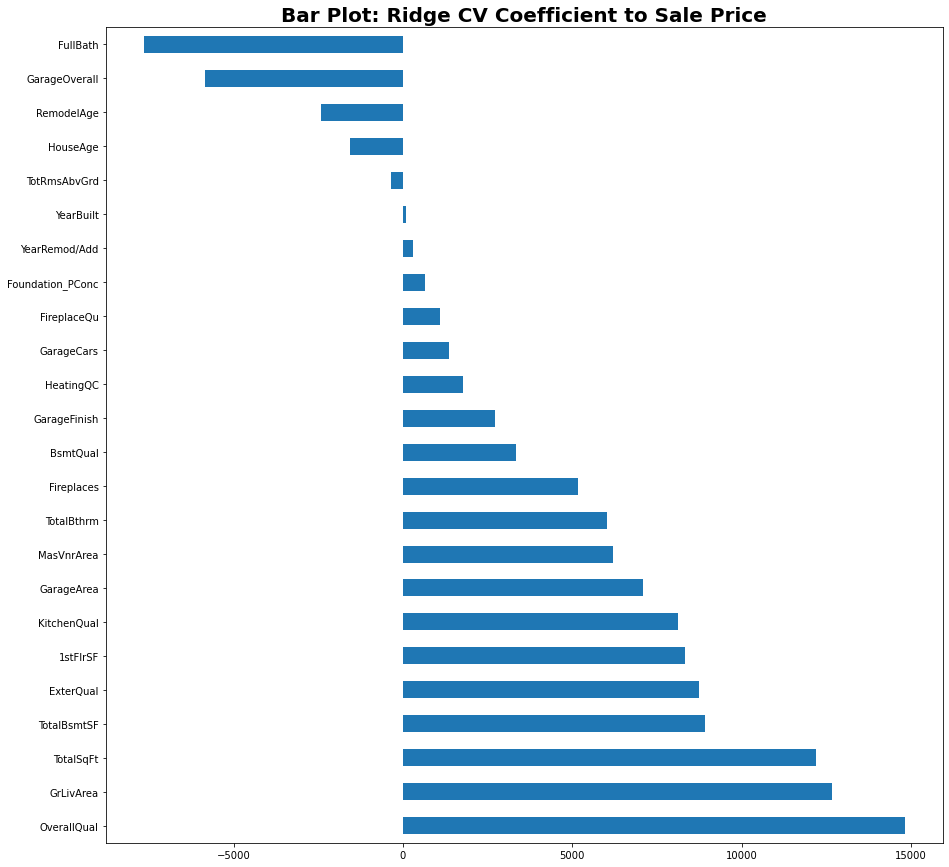

In [965]:
plt.title('Bar Plot: Ridge CV Coefficient to Sale Price', fontweight='bold', fontsize=20)
pd.Series(ridgeCV.coef_, index=dropped_low_coor.drop('SalePrice', axis=1).\
          columns).sort_values(ascending=False).plot.barh(figsize=(15,15))

In [966]:
#create the residual
residuals = y_test - pred

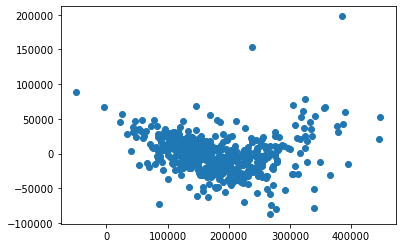

In [967]:
#plot out the residual vs predict
plt.scatter(pred, residuals)

# Polynomial Features
___

In [968]:
#set include_bias=False so as to avoid creating an extra 
#bias col which is automatically generated otherwise
poly = PolynomialFeatures(include_bias=False)

In [969]:
#store the settings for transforming features in our df
X_poly = poly.fit_transform(X)

In [970]:
#default degree of 2 is used and all combinations of multiplying 
#variables on itself and others are added to df
pd.DataFrame(X_poly, columns=poly.get_feature_names(dropped_low_coor.drop\
                                                    ('SalePrice', axis=1)\
                                                    .columns)).head()

,OverallQual,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,Foundation_PConc,HouseAge,RemodelAge,TotalBthrm,TotalSqFt,GarageOverall,OverallQual^2,OverallQual YearBuilt,OverallQual YearRemod/Add,OverallQual MasVnrArea,OverallQual ExterQual,OverallQual BsmtQual,OverallQual TotalBsmtSF,OverallQual HeatingQC,OverallQual 1stFlrSF,OverallQual GrLivArea,OverallQual FullBath,OverallQual KitchenQual,OverallQual TotRmsAbvGrd,OverallQual Fireplaces,OverallQual FireplaceQu,OverallQual GarageFinish,OverallQual GarageCars,OverallQual GarageArea,OverallQual Foundation_PConc,OverallQual HouseAge,OverallQual RemodelAge,OverallQual TotalBthrm,OverallQual TotalSqFt,OverallQual GarageOverall,YearBuilt^2,YearBuilt YearRemod/Add,YearBuilt MasVnrArea,YearBuilt ExterQual,YearBuilt BsmtQual,YearBuilt TotalBsmtSF,YearBuilt HeatingQC,YearBuilt 1stFlrSF,YearBuilt GrLivArea,YearBuilt FullBath,YearBuilt KitchenQual,YearBuilt TotRmsAbvGrd,YearBuilt Fireplaces,YearBuilt FireplaceQu,YearBuilt GarageFinish,YearBuilt GarageCars,YearBuilt GarageArea,YearBuilt Foundation_PConc,YearBuilt HouseAge,YearBuilt RemodelAge,YearBuilt TotalBthrm,YearBuilt TotalSqFt,YearBuilt GarageOverall,YearRemod/Add^2,YearRemod/Add MasVnrArea,YearRemod/Add ExterQual,YearRemod/Add BsmtQual,YearRemod/Add TotalBsmtSF,YearRemod/Add HeatingQC,YearRemod/Add 1stFlrSF,YearRemod/Add GrLivArea,YearRemod/Add FullBath,YearRemod/Add KitchenQual,YearRemod/Add TotRmsAbvGrd,YearRemod/Add Fireplaces,YearRemod/Add FireplaceQu,YearRemod/Add GarageFinish,YearRemod/Add GarageCars,YearRemod/Add GarageArea,YearRemod/Add Foundation_PConc,YearRemod/Add HouseAge,YearRemod/Add RemodelAge,YearRemod/Add TotalBthrm,YearRemod/Add TotalSqFt,YearRemod/Add GarageOverall,MasVnrArea^2,MasVnrArea ExterQual,MasVnrArea BsmtQual,MasVnrArea TotalBsmtSF,MasVnrArea HeatingQC,MasVnrArea 1stFlrSF,MasVnrArea GrLivArea,MasVnrArea FullBath,MasVnrArea KitchenQual,MasVnrArea TotRmsAbvGrd,MasVnrArea Fireplaces,MasVnrArea FireplaceQu,MasVnrArea GarageFinish,MasVnrArea GarageCars,MasVnrArea GarageArea,MasVnrArea Foundation_PConc,MasVnrArea HouseAge,MasVnrArea RemodelAge,MasVnrArea TotalBthrm,MasVnrArea TotalSqFt,MasVnrArea GarageOverall,ExterQual^2,ExterQual BsmtQual,ExterQual TotalBsmtSF,ExterQual HeatingQC,ExterQual 1stFlrSF,ExterQual GrLivArea,ExterQual FullBath,ExterQual KitchenQual,ExterQual TotRmsAbvGrd,ExterQual Fireplaces,ExterQual FireplaceQu,ExterQual GarageFinish,ExterQual GarageCars,ExterQual GarageArea,ExterQual Foundation_PConc,ExterQual HouseAge,ExterQual RemodelAge,ExterQual TotalBthrm,ExterQual TotalSqFt,ExterQual GarageOverall,BsmtQual^2,BsmtQual TotalBsmtSF,BsmtQual HeatingQC,BsmtQual 1stFlrSF,BsmtQual GrLivArea,BsmtQual FullBath,BsmtQual KitchenQual,BsmtQual TotRmsAbvGrd,BsmtQual Fireplaces,BsmtQual FireplaceQu,BsmtQual GarageFinish,BsmtQual GarageCars,BsmtQual GarageArea,BsmtQual Foundation_PConc,BsmtQual HouseAge,BsmtQual RemodelAge,BsmtQual TotalBthrm,BsmtQual TotalSqFt,BsmtQual GarageOverall,TotalBsmtSF^2,TotalBsmtSF HeatingQC,TotalBsmtSF 1stFlrSF,TotalBsmtSF GrLivArea,TotalBsmtSF FullBath,TotalBsmtSF KitchenQual,TotalBsmtSF TotRmsAbvGrd,TotalBsmtSF Fireplaces,TotalBsmtSF FireplaceQu,TotalBsmtSF GarageFinish,TotalBsmtSF GarageCars,TotalBsmtSF GarageArea,TotalBsmtSF Foundation_PConc,TotalBsmtSF HouseAge,TotalBsmtSF RemodelAge,TotalBsmtSF TotalBthrm,TotalBsmtSF TotalSqFt,TotalBsmtSF GarageOverall,HeatingQC^2,HeatingQC 1stFlrSF,HeatingQC GrLivArea,HeatingQC FullBath,HeatingQC KitchenQual,HeatingQC TotRmsAbvGrd,HeatingQC Fireplaces,HeatingQC FireplaceQu,HeatingQC GarageFinish,HeatingQC GarageCars,HeatingQC GarageArea,HeatingQC Foundation_PConc,HeatingQC HouseAge,HeatingQC RemodelAge,HeatingQC TotalBthrm,HeatingQC TotalSqFt,HeatingQC GarageOverall,1stFlrSF^2,1stFlrSF GrLivArea,1stFlrSF FullBath,1stFlrSF KitchenQual,1stFlrSF TotRmsAbvGrd,1stFlrSF Fireplaces,1stFlrSF FireplaceQu,1stF

### Model Evaluation with Polynomial Features

In [971]:
# return the average of R-squared scores for LR models applied on each 
#of the 5 folds' holdout data
# Interpretation: inclusion of interaction variable improved the 
#model performance score
cross_val_score(lr, X_poly, y, cv=5).mean()

0.8883904839351484

**Observation:**
___
After creating new columns from polynomial function,the cross validation score went up 0.01
___

## Build Linear Regression Model
___

In [972]:
# Apply simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict based on test data
lr_pred = lr.predict(X_test)

# Calculate model performance
R_squared = r2_score(lr_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.86055139968921


         Column_Name  Coefficient_Value
0        OverallQual       1.521532e+04
1          YearBuilt      -8.412885e+02
2      YearRemod/Add      -2.060682e+03
3         MasVnrArea       6.239163e+03
4          ExterQual       8.826862e+03
5           BsmtQual       3.022309e+03
6        TotalBsmtSF       8.631117e+03
7          HeatingQC       1.828989e+03
8           1stFlrSF       5.908365e+03
9          GrLivArea       5.118739e+06
10          FullBath      -4.964434e+03
11       KitchenQual       7.846947e+03
12      TotRmsAbvGrd      -4.715916e+02
13        Fireplaces       5.203224e+03
14       FireplaceQu       1.033117e+03
15      GarageFinish       2.814101e+03
16        GarageCars       1.924393e+03
17        GarageArea       2.264944e+06
18  Foundation_PConc       7.614386e+02
19          HouseAge      -3.765841e+03
20        RemodelAge      -4.585032e+03
21        TotalBthrm       9.296969e+03
22         TotalSqFt      -6.488814e+06
23     GarageOverall      -6.392195e+03


<BarContainer object of 24 artists>

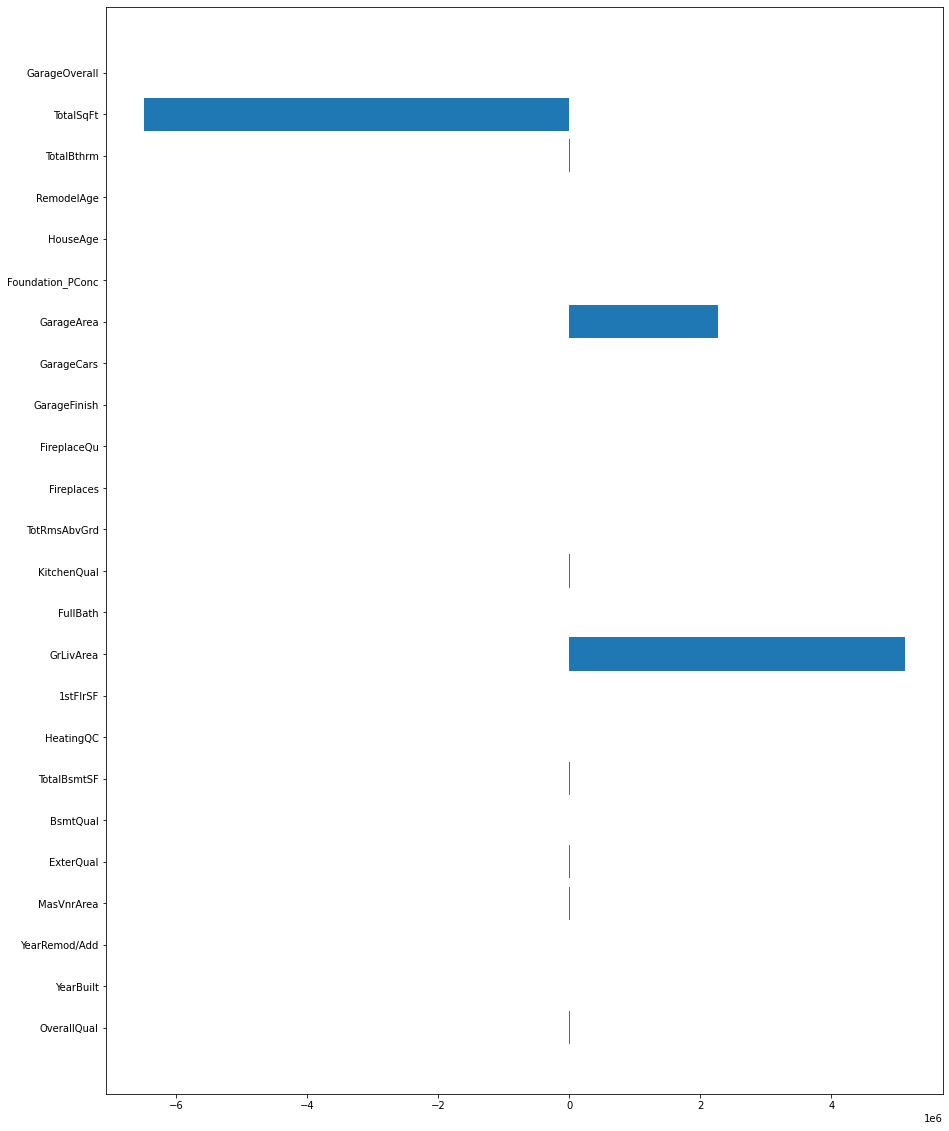

In [973]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,20)
plt.barh(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

## Build Regularization Models - Ridge Regression (L2)
___

In [974]:
# Train the model
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
ridge_pred = ridgeRegressor.predict(X_test)

# Calculate model performance
R_squared = r2_score(ridge_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8584976078011225


**Observation:**
___
The test R2 score is lower than linear regression score.  Not the best score. 
___

         Column_Name  Coefficient_Value
0        OverallQual       14983.201287
1          YearBuilt       -1109.393719
2      YearRemod/Add       -1472.939803
3         MasVnrArea        6165.442541
4          ExterQual        8765.993362
5           BsmtQual        3254.680760
6        TotalBsmtSF        8956.312556
7          HeatingQC        1754.441687
8           1stFlrSF        8263.981842
9          GrLivArea       13693.512768
10          FullBath       -7845.301169
11       KitchenQual        8108.238093
12      TotRmsAbvGrd        -535.556880
13        Fireplaces        5264.140778
14       FireplaceQu         960.046939
15      GarageFinish        2762.335963
16        GarageCars        1472.231201
17        GarageArea        7514.908761
18  Foundation_PConc         610.416763
19          HouseAge       -2797.278388
20        RemodelAge       -4161.376500
21        TotalBthrm        6072.963302
22         TotalSqFt       11246.010891
23     GarageOverall       -6157.320243


<BarContainer object of 24 artists>

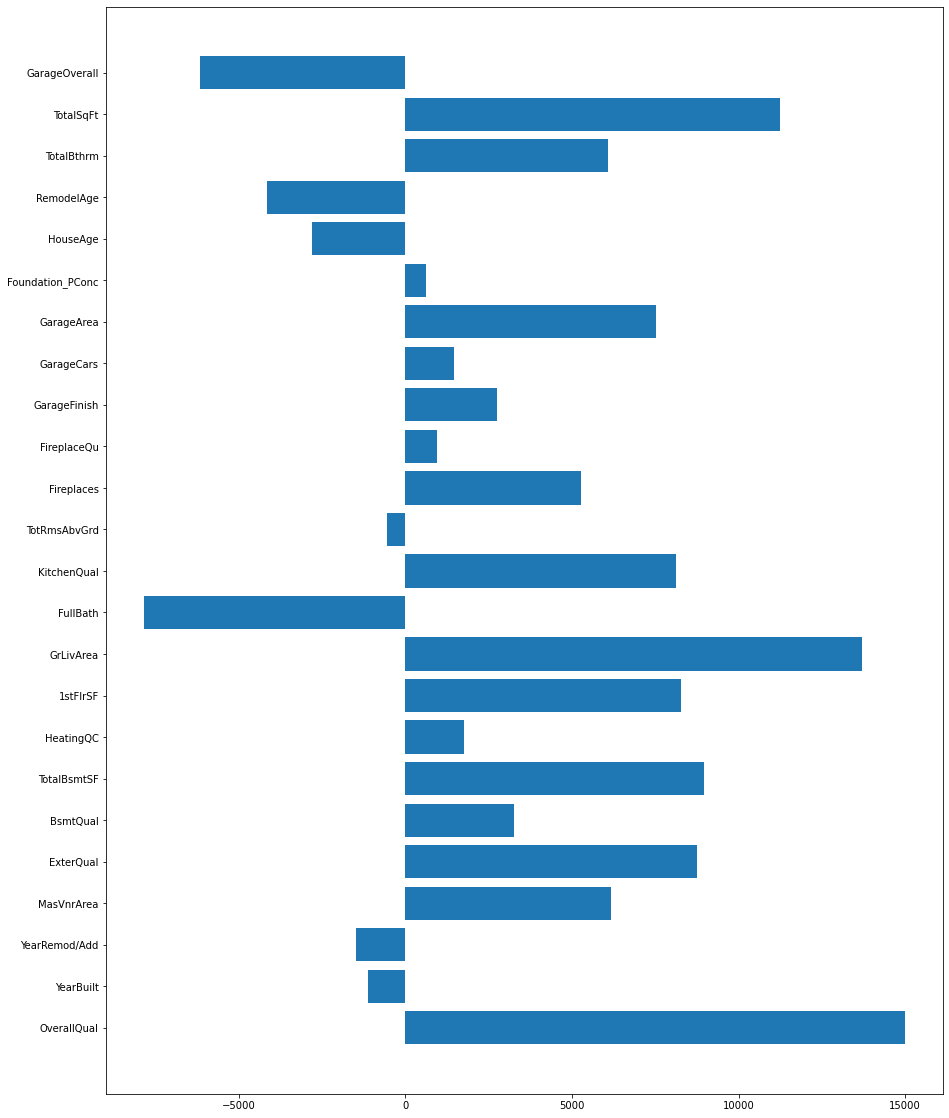

In [975]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)

# Preview variables' coefficient values
print(coefficient_df)

# Plot the coefficent values
plt.rcParams['figure.figsize'] = (15,20)
plt.barh(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

# L2 Regularization has increased the coefficient from what has been observed in Linear Regression

## Build Regularization Models - Lasso Regression (L1)
___

In [976]:
# Train the model
lassoRegressor = Lasso()
lassoRegressor.fit(X_train, y_train)
lasso_pred = lassoRegressor.predict(X_test)

# Calculate model performance
R_squared = r2_score(lasso_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8584773170360297


**Observation:**
___
The test R2 score from Lasso regression is lowest of all.
___

         Column_Name  Coefficient_Value
0        OverallQual       14991.353654
1          YearBuilt        4641.750366
2      YearRemod/Add       -4680.913636
3         MasVnrArea        6163.627355
4          ExterQual        8771.205936
5           BsmtQual        3249.137480
6        TotalBsmtSF        8964.238176
7          HeatingQC        1754.512285
8           1stFlrSF        8245.487097
9          GrLivArea       33231.256095
10          FullBath       -7850.343375
11       KitchenQual        8104.917316
12      TotRmsAbvGrd        -554.658250
13        Fireplaces        5264.985610
14       FireplaceQu         953.896267
15      GarageFinish        2769.114194
16        GarageCars        1498.012533
17        GarageArea       16148.292763
18  Foundation_PConc         606.809497
19          HouseAge        2945.412356
20        RemodelAge       -7369.628419
21        TotalBthrm        6074.272177
22         TotalSqFt      -13582.284794
23     GarageOverall       -6199.935826


<BarContainer object of 24 artists>

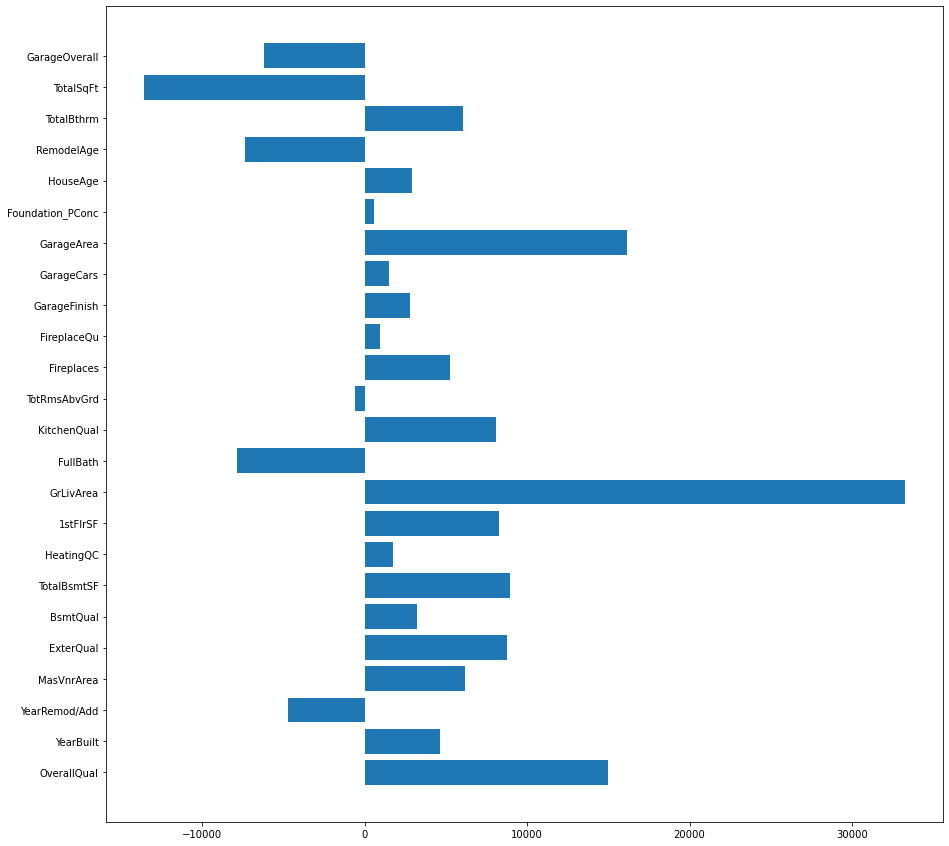

In [977]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)

# Preview variables' coefficient values
print(coefficient_df)

# Plot the coefficent values
plt.rcParams['figure.figsize'] = (15,15)
plt.barh(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

# L2 Regularization has the coefficient values from what has been observed in Linear Regression

## Using Regularization Models for Feature Selection

In [978]:
# Drop the RemodelAge, HouseAge, & Foundation_PConc column 
columns_to_drop = ['RemodelAge', 'HouseAge', 'Foundation_PConc']
predictors_v2 = X.drop(columns=columns_to_drop, axis=1)
predictors_v2.head()

,OverallQual,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,TotalBthrm,TotalSqFt,GarageOverall
0,6,1976,2005,289,3,3,725,4,725,1479,2,3,6,0,0,2,2,475,3,1957,5
1,7,1996,1997,132,3,4,913,4,913,2122,2,3,8,1,3,2,2,559,4,2684,5
2,5,1953,2007,0,2,3,1057,2,1057,1057,1,3,5,0,0,1,1,246,2,1304,4
3,5,2006,2007,0,2,4,384,3,744,1444,2,2,7,0,0,3,2,400,3,1847,5
4,6,1900,1993,0,2,2,676,2,831,1445,2,2,6,0,0,1,2,484,2,1931,5


In [979]:
X_train, X_test, y_train, y_test = train_test_split(predictors_v2, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1533, 21)
(511, 21)


In [980]:
# Apply simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict based on test data
lr_pred = lr.predict(X_test)

# Calculate model performance
R_squared = r2_score(lr_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8343682599620201


___
**Observation:**
The test R2 after using regularization is has a lower score compare to the Ridge score.  Not best choice.
___

[^ Return to Contents](#Contents:)

## Final Model: Ridge Model
___
Ridge test R2 has the best score

### Basic Setup for Final Ridge Model

In [981]:
# perform feature scaling for Ridge CV
ridge_sc = StandardScaler()
ridge_fit= ridge_sc.fit_transform(X)

In [982]:
#instantiate
final_ridgeCV = RidgeCV(alphas=np.linspace(.1, 10, 100), cv=5)

In [983]:
#fit Ridge model
final_ridgeCV = final_ridgeCV.fit(ridge_fit, y)

In [984]:
#out the optimal Ridge of fitted Ridge CV model
final_ridgeCV.alpha_

10.0

### Intercept for Final Ridge Model

In [985]:
#find intercept
final_ridgeCV.intercept_

181403.86007827788

### Coefficient for Final Ridge Model

In [986]:
#find coefficient
final_coef_ridgeCV = pd.DataFrame({'Feature': X.columns, 'Coefficients': final_ridgeCV.coef_, 
                                    '|Coefficients|': np.abs(final_ridgeCV.coef_)})
final_coef_ridgeCV = final_coef_ridgeCV.sort_values('|Coefficients|', ascending=False)

#see output
final_coef_ridgeCV

,Feature,Coefficients,|Coefficients|
0,OverallQual,14463.649533,14463.649533
9,GrLivArea,11779.828131,11779.828131
22,TotalSqFt,11409.609470,11409.609470
6,TotalBsmtSF,9132.975396,9132.975396
4,ExterQual,8679.569647,8679.569647
8,1stFlrSF,8150.512186,8150.512186
11,KitchenQual,8075.874876,8075.874876
17,GarageArea,7050.081405,7050.081405
10,FullBath,-7020.413698,7020.413698
21,TotalBthrm,6924.036469,6924.036469


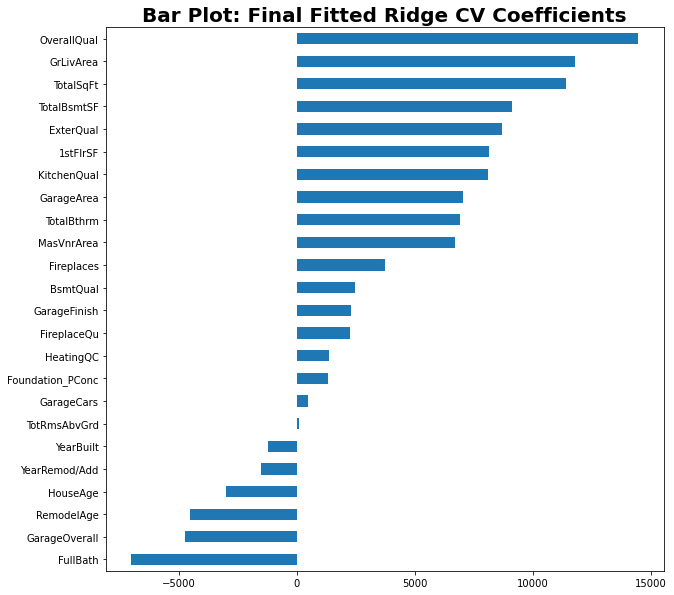

In [987]:
#visualise fitted Ridge CV's coeff
plt.title('Bar Plot: Final Fitted Ridge CV Coefficients', fontweight='bold', fontsize=20)
pd.Series(final_ridgeCV.coef_, index=X.columns).sort_values(ascending=True).plot.barh(figsize=(10, 10));

___
**Observation:**
Factoring in the visual and numerial information from above, there a few things to takeaway:
- The top 5 features are within expectation of what buyers and seller will look out for when thinking of purchasing/selling their house
- The pricing of each house does correlate to the top 5 features. As the values go up, so will the price point.
- Surprising to see that the Total Rooms Above Ground stays pretty neutral. Assumption like future remodelling or full tear down and rebuild can play a factor to this equation.
___

### Prediction for Final Ridge Model

In [988]:
#use Ridge CV fitted model to predict dataset targets
y_pred = final_ridgeCV.predict(ridge_fit)

### Final Ridge Model Scores

In [989]:
#get scores 
ridge_R2 = metrics.r2_score(y, y_pred)
ridge_final_mse = metrics.mean_squared_error(y, y_pred)

print('Ridge Regression R-Squared:', ridge_R2)
print('Ridge Regression Mean Squared Error:', ridge_final_mse)

Ridge Regression R-Squared: 0.8640621327517759
Ridge Regression Mean Squared Error: 855489597.5091826


___
**Obersvation:** 
Base from the ridge regressions above, it indicates that it is able to determine the price of the house within 86.4% based using the features that were used.
___

### Prediction of Errors
___

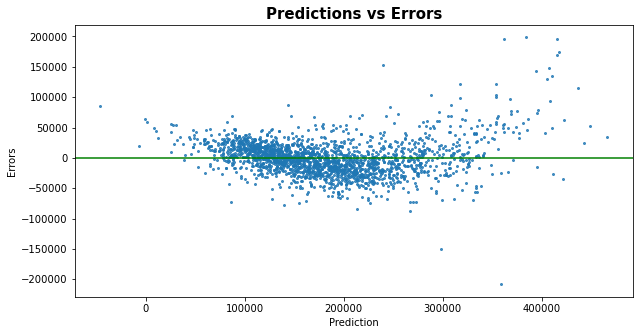

In [990]:
#create scatter plot to see if there are any errors in variance
plt.figure(figsize=(10, 5))
plt.title('Predictions vs Errors', fontweight='bold', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Errors')
plt.axhline(0, color='green')
plt.scatter(y_pred, y - y_pred, s=4, alpha=0.8);

___
**Observation:** 
The variance of errors are scatter all over the place.  This means that it does not have an equal variance which is not what we want to see.
___

[^ Return to Contents](#Contents:)

# Kaggle
___

In [991]:
#import all numerical Test CSV file
final_test_csv = pd.read_csv('../Data/full number test dataframe.csv')

In [992]:
final_test_csv.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,CentralAir_N,CentralAir_Y,Functional_2.0,Functional_3.0,Functional_4.0,Functional_5.0,Functional_6.0,Functional_7.0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,2658,902301120,190,69,9142,0,3,2,6,8,1910,1950,0,2,1,2,3,1,1,0,1,0,1020,1020,3,1,908,1020,0,1928,0,0,2,0,4,2,1,9,0,0,1910,1,1,440,1,1,2,0,60,112,0,0,0,0,4,2006,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2718,905108090,90,66,9662,1,3,2,5,4,1977,1977,0,2,2,4,3,1,1,0,1,0,1967,1967,2,4,1967,0,0,1967,0,0,2,0,6,2,2,10,0,0,1977,3,2,580,3,3,2,170,0,0,0,0,0,0,8,2006,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [993]:
#new 'HouseAge' column
final_test_csv['HouseAge'] = final_test_csv['YrSold'] - final_test_csv['YearBuilt']

In [994]:
#new 'RemodelAge' column
final_test_csv['RemodelAge'] = final_test_csv['YrSold'] - final_test_csv['YearRemod/Add']

In [995]:
#new 'TotalBthrm' column
final_test_csv['TotalBthrm'] = final_test_csv['BsmtFullBath']+final_test_csv['BsmtHalfBath']\
+final_test_csv['FullBath']+final_test_csv['HalfBath']

In [996]:
#new 'TotalSqFt' column
final_test_csv['TotalSqFt'] = final_test_csv['GrLivArea']+final_test_csv['GarageArea']+\
final_test_csv['FullBath']+final_test_csv['HalfBath']

In [997]:
#new "GarageOverall" column
final_test_csv['GarageOverall'] = final_test_csv['GarageQual']+final_test_csv['GarageCars']

In [998]:
final_test_csv.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,CentralAir_N,CentralAir_Y,Functional_2.0,Functional_3.0,Functional_4.0,Functional_5.0,Functional_6.0,Functional_7.0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,HouseAge,RemodelAge,TotalBthrm,TotalSqFt,GarageOverall
0,2658,902301120,190,69,9142,0,3,2,6,8,1910,1950,0,2,1,2,3,1,1,0,1,0,1020,1020,3,1,908,1020,0,1928,0,0,2,0,4,2,1,9,0,0,1910,1,1,440,1,1,2,0,60,112,0,0,0,0,4,2006,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,96,56,2,2370,2
1,2718,905108090,90,66,9662,1,3,2,5,4,1977,1977,0,2,2,4,3,1,1,0,1,0,1967,1967,2,4,1967,0,0,1967,0,0,2,0,6,2,2,10,0,0,1977,3,2,580,3,3,2,170,0,0,0,0,0,0,8,2006,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0

In [999]:
len(final_test_csv)

877

In [1000]:
dropped_low_coor.columns

Index(['OverallQual', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice',
       'Foundation_PConc', 'HouseAge', 'RemodelAge', 'TotalBthrm', 'TotalSqFt',
       'GarageOverall'],
      dtype='object')

In [1001]:
FEATURES = list(dropped_low_coor.columns)

In [1002]:
FEATURES.remove('SalePrice')

In [1003]:
#FEATURES.remove('GarageOverall')

In [1004]:
final_test_csv = final_test_csv[FEATURES]

In [1005]:
final_test_ss = ss.transform(final_test_csv)

In [1006]:
y_pred_test = final_ridgeCV.predict(final_test_ss)

In [1007]:
# round predictions to 4 decimal places
y_pred_test = np.round(y_pred_test, decimals=4)

len(y_pred_test)

877

In [1008]:
#Have to drop one to match number of rows
test_df.drop(index=877, inplace=True)

In [1009]:
len(test_df['Id'])

877

In [1010]:
predictions_final = pd.DataFrame({'Id':test_df['Id'].values, 'SalePrice':y_pred_test})

In [1011]:
#export predictions_final
predictions_final.to_csv('../Data/Final_Predictions.csv', index=False)

# Recommedations & Conclusions
____
The idea behind this study is to allow both home buyers and sellers to understand what are the top few features to takeaway before they dive into the market.  They can also utilize the model to assist them on predicting an approriate house value that does not over nor under sale to the market value.  

Built feature engineering on various features were expected to be significant determinants of house prices. The engineered data ran through three linear regression models: OLS, Ridge and Lasso. The assorted property size variables, namely living area, basement finished area, lot area and garage area, were all found to be positively correlated to the sale price. Build quality and condition were also found to be among the most important determinants of house prices.

This is believed to be a good starting point for consumers to use to get the fundamental idea of what to look out for or how to market their property.  Futher in-depth studies can be conducted in future where we can dive deeper into each feature and break it down even further to give the customers better results.  Some ideas would be public transportation, proximity to nearby parks, eateries, entertainment, etc, and many more.  
___

**Side Note:** 

If I want to improve the score for this, I would consider to change the way the columns were dropped.  Instead of dropping with a written function, I should of used lasso function to aggressively get ride of the noise and low correlation variances then followed up by the written function.  This may change my end result of this project.

[^ Return to Contents](#Contents:)